# Neural Net CookBook
---
Seungwoo Schin - DataDiving

## Contents
- 1 Overview of the Whole Architecture 전체 아키텍쳐 개요                                  1
- 2 PyTorch Tensors and Basic Operations PyTorch 텐서 및 기본 작업                         5
- 3 Building Models                                                                       13
    - 3.1 Feedforward Network . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 14
    - 3.2 Recurrent Neural Network . . . . . . . . . . . . . . . . . . . . . . . . . . . .15
    - 3.3 LSTM . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .17
    - 3.4 Transformer . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 19
    - 3.5 Convolutional Neural Networks (CNNs) . . . . . . . . . . . . . . . . . . . . . .20
- 4 Training and Evaluating the Model                                                     21
    - 4.1 Standard Training Loop. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 21
    - 4.2 Model Evaluation and Metrics . . . . . . . . . . . . . . . . . . . . . . . . . .23
    - 4.3 Various Training Techniques . . . . . . . . . . . . . . . . . . . . . . . . . . 25
- 5 Loss Functions in PyTorch                                                             28
    - 5.1 Cheat Sheet(code) for each Loss Function . . . . . . . . . . . . . . . . . . . .30
    - 5.2 Explanation of Key Concepts . . . . . . . . . . . . . . . . . . . . . . . . . . 34
    - 5.3 Detailed Explanation . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .35

## 1 Overview of the Whole Architecture 
- In this section, we will walk through the typical flow of deep learning code using PyTorch.
- The process involves several key steps:
- 이 섹션에서는 PyTorch를 사용한 딥러닝 코드의 일반적인 흐름을 살펴보겠습니다.
- 프로세스에는 몇 가지 주요 단계가 포함됩니다.
1. Collecting and preparing data.
2. Building the model.
3. Training the model.
4. Evaluating the model. 평가
5. Tuning hyperparameters.

- Each step is crucial for developing effective neural networks.
- Below, we provide detailed explana-tions and carefully crafted code examples for each part
- 각 단계는 효과적인 신경망을 개발하는 데 중요합니다.
- 아래에서는 각 부분에 대한 자세한 설명과 신중하게 작성된 코드 예제를 제공합니다.

- Collecting and Preparing Data
    The first step is to collect or generate data and prepare it for training.
    This involves converting data into tensors and creating datasets and data loaders.
- Converting Data into Tensors
    Assuming you have data in the form of NumPy arrays or lists, you can convert them into PyTorch tensors using torch.tensor.

- 데이터 수집 및 준비
    첫 번째 단계는 데이터를 수집하거나 생성하고 훈련을 위해 준비하는 것입니다.
    여기에는 데이터를 텐서로 변환하고 데이터세트와 데이터 로더를 만드는 작업이 포함됩니다.
- 데이터를 텐서로 변환
    NumPy 배열이나 목록 형식의 데이터가 있다고 가정하면 torch.tensor를 사용하여 이를 PyTorch 텐서로 변환할 수 있습니다.

In [ ]:
%pip install torch

In [ ]:
import sys
print(*sys.path,sep='\n')


In [3]:
import torch
import numpy as np
# Example data
features_np = np.random.rand(1000, 20) # 1000 samples, 20 features
labels_np = np.random.randint(0, 2, size=(1000,)) # Binary lables
# Convert to tensors
features = torch.tensor(features_np, dtype=torch.float32)
labels = torch.tensor(labels_np, dtype=torch.long)

In [ ]:
print(features_np.shape,features_np, labels_np.shape,labels_np,
      features.shape,features, labels.shape,labels,sep='\n')

- Creating a TensorDataset and DataLoader
- Once the data is in tensor form, we can create a TensorDataset and wrap it with a DataLoader for easy batching and shuffling.
- TensorDataset 및 DataLoader 만들기
- 데이터가 텐서 형식이면 TensorDataset를 생성하고 이를 DataLoader로 래핑하여 쉽게 일괄 처리하고 섞을 수 있습니다.

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
# Create a TensorDataset
dataset = TensorDataset(features, labels)
# Create a DataLoader
batch_size = 32
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
'''
from torch.utils.data import DataLoader

# 1번 인수: dataset
# - PyTorch에서 데이터를 관리하는 핵심 클래스인 Dataset의 인스턴스를 전달해야 함.
# - Dataset 클래스는 데이터를 어떻게 가져올지, 접근할지 정의함.
# - 예시: torchvision.datasets.MNIST 또는 커스텀 Dataset 클래스.

# 2번 인수: batch_size
# - 데이터를 몇 개씩 한 번에 처리할지 결정함.
# - 예를 들어, batch_size=32이면, 32개의 데이터를 한 묶음으로 처리함.
# - 기본값은 1.

# 3번 인수: shuffle
# - 매 epoch마다 데이터를 랜덤으로 섞을지 설정하는 옵션.
# - True로 설정하면 매번 데이터를 섞어서 학습 시 데이터 순서에 대한 의존을 줄임.
# - False로 설정하면 원래 순서대로 데이터를 처리함.
# - 기본값은 False.

# 4번 인수: sampler
# - 데이터를 어떻게 샘플링할지를 정의하는 객체.
# - 기본적으로 shuffle=True를 설정하면 내부적으로 RandomSampler가 사용됨.
# - 커스텀 샘플링 전략이 필요할 경우 사용할 수 있음.

# 5번 인수: batch_sampler
# - batch_size와 sampler를 결합하여 배치 단위로 샘플링하는 방법을 정의하는 옵션.
# - batch_sampler는 배치를 어떻게 구성할지 직접 정의할 수 있음.
# - 기본적으로는 사용하지 않음. batch_size와 sampler로 충분히 설정 가능.

# 6번 인수: num_workers
# - 데이터를 로드할 때 사용할 worker 프로세스의 수를 지정함.
# - 기본적으로 num_workers=0이면 데이터 로드는 메인 프로세스에서 이루어짐.
# - num_workers를 늘리면 데이터를 병렬로 로드할 수 있어 속도 향상 가능.

# 7번 인수: collate_fn
# - 각 batch에서 데이터를 어떻게 결합할지 정의하는 함수.
# - 기본적으로는 전달받은 데이터를 텐서로 묶어서 반환하지만, 커스텀 방식으로 결합할 때 사용할 수 있음.
# - 예를 들어, NLP에서 서로 길이가 다른 문장들을 패딩 처리할 때 사용 가능.

# 8번 인수: pin_memory
# - True로 설정하면, GPU 사용 시 데이터를 더 빠르게 전송할 수 있음.
# - CPU에서 GPU로 데이터를 복사할 때 성능을 향상시킬 수 있음.
# - GPU 사용 시 성능 최적화를 위해 True로 설정할 수 있음.
# - 기본값은 False.

# 9번 인수: drop_last
# - 데이터셋 크기가 배치 크기로 나누어 떨어지지 않을 때, 마지막 남은 배치를 버릴지 여부.
# - True로 설정하면 마지막 배치가 남은 경우 이를 버리고, False면 그대로 사용함.
# - 예를 들어, batch_size가 32이고, 데이터가 100개인 경우 마지막 4개 데이터를 버릴지 결정함.
# - 기본값은 False.

# DataLoader 예시
# dataset: PyTorch Dataset 객체
# batch_size: 한 번에 처리할 데이터의 크기
# shuffle: 데이터를 랜덤으로 섞을지 여부
# drop_last: 나머지 데이터가 남을 때 마지막 배치를 버릴지 여부

dataloader = DataLoader(dataset, batch_size=32, shuffle=True, drop_last=True, num_workers=4)

# DataLoader 사용 예시
for data, labels in dataloader:
    # data: 배치로 묶인 입력 데이터
    # labels: 해당 데이터에 맞는 레이블
    # 여기서 모델 학습 또는 예측 진행 가능
    pass
'''

- Explanation:
  - TensorDataset takes tensors as input and creates a dataset where each sample is a tuple of the tensors at a given index.
  - • DataLoader wraps the dataset and provides an iterable over the dataset with support for automatic batching, sampling, shuffling, and multiprocess data loading.
- Building the Model
  - Next, we define the neural network architecture by creating a subclass of torch.nn.Module.
- 설명:
  - TensorDataset는 텐서를 입력으로 사용하고 각 샘플이 주어진 인덱스에 있는 텐서의 튜플인 데이터세트를 생성합니다.
  - • DataLoader는 데이터 세트를 래핑하고 자동 일괄 처리, 샘플링, 셔플링 및 다중 프로세스 데이터 로드를 지원하여 데이터 세트에 대한 반복 가능 항목을 제공합니다.
- 모델 구축
  - 다음으로, torch.nn.Module의 하위 클래스를 생성하여 신경망 아키텍처를 정의합니다.

In [6]:
import torch.nn as nn

class SimpleNeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)   # First fully connected layer (입력 크기 -> 은닉층 크기)
        self.relu = nn.ReLU()                           # Activation function # 활성함수
        self.fc2 = nn.Linear(hidden_size, num_classes)  # Second fully connected layer (은닉층 크기 -> 출력 클래스 크기)
    
    def forward(self, x): # 순전파 함수 정의
        out = self.fc1(x)
        out = self.relu(out) # 1번째 완전 연결 레이어 통과후 활성함수 ReLu적용
        out = self.fc2(out)
        return out # 2번째 레이어 통과후 결과 반환

- Explanation:
  - The __init__ method defines the layers and activation functions.
  - The forward method defines the forward pass computation
- Training the Model
    - To train the model, we need to define a loss function and an optimizer, and\
    then iterate over the data in epochs.\
- 설명:
  - __init__ 메소드는 레이어와 활성화 함수를 정의합니다.
  - 순방향 방법은 순방향 전달 계산을 정의합니다.
- 모델 훈련
    - 모델을 훈련하려면 손실 함수와 최적화 프로그램을 정의해야 하며,\
    그런 다음 에포크 단위로 데이터를 반복합니다.

- Defining Loss Function and Optimizer
- 손실 함수 및 최적화 정의

In [7]:
# Initialize the model, loss function, and optimizer
input_size = 20 # Number of input features
hidden_size = 64 # Number of neurons in the hidden layer
num_classes = 2 # Number of output classes
learning_rate = 0.001

model = SimpleNeuralNet(input_size, hidden_size, num_classes)

criterion = nn.CrossEntropyLoss() # Loss function for classification
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

- Explanation:
  - nn.CrossEntropyLoss combines nn.LogSoftmax and nn.NLLLoss in one single class.
  - torch.optim.Adam is an optimization algorithm that can be used instead of the classical
    stochastic gradient descent procedure.
- Training Loop
- 설명:
  - nn.CrossEntropyLoss는 nn.LogSoftmax와 nn.NLLLoss를 하나의 단일 클래스로 결합합니다.
  - torch.optim.Adam은 기존 알고리즘 대신 사용할 수 있는 최적화 알고리즘입니다.
    확률적 경사하강법 절차.
- 훈련 루프

In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    for batch_features, batch_labels in data_loader:
        # Forward pass
        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

- Explanation:
  - The training loop iterates over epochs and batches.
  - For each batch, we perform a forward pass, compute the loss, perform a backward pass, and
    update the model parameters.
- 설명:
  - 훈련 루프는 에포크(epoch)와 배치(batch)에 걸쳐 반복됩니다.
  - 각 배치에 대해 정방향 패스를 수행하고, 손실을 계산하고, 역방향 패스를 수행하고,
    모델 매개변수를 업데이트합니다.

- Evaluating the Model
  - After training, we evaluate the model’s performance on a validation or test set.
- Evaluation Function
- 모델 평가
  - 훈련 후에는 검증 또는 테스트 세트에서 모델의 성능을 평가합니다.
- 평가 함수

In [9]:
def evaluate_model(model, data_loader):
    model.eval() # Set model to evaluation mode
    with torch.no_grad():
        correct = 0
        total = 0
        for batch_features, batch_labels in data_loader:
            outputs = model(batch_features)
            _, predicted = torch.max(outputs.data, 1)
            total += batch_labels.size(0)
            correct += (predicted == batch_labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f'Accuracy of the model on the test data: {accuracy:.2f}%')
    return accuracy

- Explanation:
  - model.eval() sets the model to evaluation mode, affecting layers like dropout and batch normalization.
  - torch.no_grad() disables gradient calculation, reducing memory consumption and speed-ing up computations.
  - torch.max(outputs.data, 1) returns the indices of the maximum value in each row, corre-sponding to the predicted class.
- Running Evaluation
  - Assuming we have a test_loader similar to data_loader:
- 설명:
  - model.eval()은 모델을 평가 모드로 설정하여 드롭아웃 및 배치 정규화와 같은 레이어에 영향을 줍니다.
  - torch.no_grad()는 기울기 계산을 비활성화하여 메모리 소비를 줄이고 계산 속도를 높입니다.
  - torch.max(outputs.data, 1)는 예측된 클래스에 해당하는 각 행의 최대값 인덱스를 반환합니다.
- 평가 진행
  - data_loader와 유사한 test_loader가 있다고 가정합니다.

In [ ]:
# Evaluate the model
evaluate_model(model, data_loader) # Here, using the same data_loader for simplicity
# 단순화를 위해 동일data_loader사용

- Tuning Hyperparameters
  - Hyperparameter tuning involves experimenting with different settings to improve model performance.
- Example: Manual Hyperparameter Tuning
- 하이퍼파라미터 튜닝
  - 초매개변수 조정에는 모델 성능을 개선하기 위해 다양한 설정을 실험하는 작업이 포함됩니다.
- 예: 수동 하이퍼파라미터 튜닝

In [ ]:
# Lists of hyperparameters to try
learning_rates = [0.01, 0.001, 0.0001]
hidden_sizes = [32, 64, 128]

best_accuracy = 0
best_params = {}

for lr in learning_rates:
    for hs in hidden_sizes:
        # Initialize the model with current hyperparameters
        model = SimpleNeuralNet(input_size, hs, num_classes)
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        
        # Training loop
        for epoch in range(num_epochs):
            for batch_features, batch_labels in data_loader:
                outputs = model(batch_features)
                loss = criterion(outputs, batch_labels)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
        
        # Evaluate the model
        accuracy = evaluate_model(model, data_loader)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'learning_rate': lr, 'hidden_size': hs}

print(f'Best Hyperparameters: {best_params}, Accuracy: {best_accuracy:.2f}%')

- Explanation:
  - This is a simple grid search over specified hyperparameters.
  - For each combination, the model is trained and evaluated.
  - The best hyperparameters are selected based on the highest accuracy.
- Summary
  - This workflow provides a foundational template for developing deep learning models:
  1. Data is prepared and loaded efficiently.
  2. Models are built with clear architectures.
  3. Training loops are structured for clarity and extensibility.
  4. Evaluation functions provide insight into model performance.
  5. Hyperparameter tuning allows for systematic improvement.
- 설명:
  - 지정된 하이퍼파라미터에 대한 간단한 그리드 검색입니다.
  - 각 조합에 대해 모델을 훈련하고 평가합니다.
  - 가장 높은 정확도를 기준으로 최고의 하이퍼파라미터가 선택됩니다.
- 요약
  - 이 워크플로는 딥 러닝 모델 개발을 위한 기본 템플릿을 제공합니다.
  1. 데이터가 효율적으로 준비되고 로드됩니다.
  2. 모델은 명확한 아키텍처로 구축됩니다.
  3. 훈련 루프는 명확성과 확장성을 위해 구성되었습니다.
  4. 평가 기능은 모델 성능에 대한 통찰력을 제공합니다.
  5. 하이퍼파라미터 튜닝을 통해 체계적인 개선이 가능합니다.

## 2 PyTorch Tensors and Basic Operations

- In PyTorch, the fundamental data structure is the torch.Tensor.\
  Tensors are multi-dimensional arrays similar to NumPy’s ndarray, but they can be operated on a GPU to accelerate computing.
- PyTorch에서 기본적인 데이터 구조는 torch.Tensor입니다.\
  Tensor는 NumPy의 ndarray와 유사한 다차원 배열이지만 컴퓨팅 속도를 높이기 위해 GPU에서 작동할 수 있습니다.

- Creating Tensors
  - PyTorch provides several functions to create tensors in different ways:
    - torch.tensor(data): Creates a tensor from data.
    - torch.zeros(size): Creates a tensor filled with zeros.
    - torch.ones(size): Creates a tensor filled with ones.
    - torch.arange(start, end, step): Creates a tensor with values from start to end with a step size.
    - torch.linspace(start, end, steps): Creates a tensor with steps equally spaced points between start and end.
    - torch.rand(size): Creates a tensor with random values uniformly distributed between 0 and 1.
    - torch.randn(size): Creates a tensor with random values from a standard normal distribu-tion
- 텐서 생성
  - PyTorch는 다양한 방식으로 텐서를 생성할 수 있는 여러 기능을 제공합니다.
    - torch.tensor(data): 데이터로부터 텐서를 생성합니다.
    - torch.zeros(size): 0으로 채워진 텐서를 생성합니다.
    - torch.ones(size): 1로 채워진 텐서를 생성합니다.
    - torch.arange(start, end, step): 시작부터 끝까지 단계 크기의 값을 가진 텐서를 생성합니다.
    - torch.linspace(start, end, steps): 시작과 끝 사이에 동일한 간격의 지점이 있는 텐서를 생성합니다.
    - torch.rand(size): 0과 1 사이에 균일하게 분포된 임의의 값을 갖는 텐서를 생성합니다.
    - torch.randn(size): 표준 정규 분포에서 임의의 값을 가진 텐서를 생성합니다.
- Example Code:

In [ ]:
import torch

# Create a tensor from data
data = [[1, 2], [3, 4]]
tensor_from_data = torch.tensor(data)

# Create tensors with specific functions
zeros_tensor = torch.zeros((2, 2))
ones_tensor = torch.ones((2, 2))
arange_tensor = torch.arange(0, 10, 2)
linspace_tensor = torch.linspace(0, 1, steps=5)
rand_tensor = torch.rand((2, 2))
randn_tensor = torch.randn((2, 2))

# Example Execution and Results:
'''
tensor_from_data:
tensor([[1, 2],
        [3, 4]])

zeros_tensor:
tensor([[0., 0.],
        [0., 0.]])

ones_tensor:
tensor([[1., 1.],
        [1., 1.]])
arange_tensor:
tensor([0, 2, 4, 6, 8])

linspace_tensor:
tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])

rand_tensor:
tensor([[0.1234, 0.5678],
        [0.9012, 0.3456]])

randn_tensor:
tensor([[ 0.1234, -1.2345],
        [ 0.5678, 0.9012]])
'''

- Indexing and Slicing
  - Similar to NumPy arrays, tensors can be indexed and sliced.
- Example Code:
- 인덱싱 및 슬라이싱
  - NumPy 배열과 유사하게 텐서는 인덱싱 및 슬라이스가 가능합니다.
- 예제 코드:

In [ ]:
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Indexing
element = tensor[0, 1] # Access element at first row, second column

# Slicing
row = tensor[1, :] # Access second row
column = tensor[:, 2] # Access third column
sub_tensor = tensor[0:2, 1:3] # Access a sub-tensor

# Example Execution and Results:
'''
element:
tensor(2)

row:
tensor([4, 5, 6])

column:
tensor([3, 6])

sub_tensor:
tensor([[2, 3],
        [5, 6]])

- Input Shape: (2, 3)
- Output Shapes:
    - element: ()
    - row: (3,)
    - column: (2,)
    - sub_tensor: (2, 2)
'''

- Reshaping Operations
  - These operations change the shape of the tensor without changing its data.
    - tensor.view(shape): Returns a new tensor with the same data but different shape.
    - tensor.reshape(shape): Similar to view, but can handle non-contiguous tensors.
    - tensor.unsqueeze(dim): Returns a new tensor with a dimension of size one inserted at the specified position.
    - tensor.squeeze(dim): Returns a tensor with all the dimensions of size 1 removed.
    - tensor.permute(dims): Returns a view of the original tensor with its dimensions permuted.
    - tensor.transpose(dim0, dim1): Swaps two dimensions of the tensor.
- 작업 재구성
  - 이러한 작업은 데이터를 변경하지 않고 텐서의 모양을 변경합니다.
    - tensor.view(shape): 데이터는 동일하지만 모양이 다른 새 텐서를 반환합니다.
    - tensor.reshape(shape): 뷰와 유사하지만 연속되지 않은 텐서를 처리할 수 있습니다.
    - tensor.unsqueeze(dim): 지정된 위치에 삽입된 크기 1의 새 텐서를 반환합니다.
    - tensor.squeeze(dim): 크기 1의 모든 차원이 제거된 텐서를 반환합니다.
    - tensor.permute(dims): 차원이 순열된 원본 텐서의 뷰를 반환합니다.
    - tensor.transpose(dim0,dim1): 텐서의 두 차원을 교환합니다.
- Example Code:

In [ ]:
tensor = torch.arange(0, 8)
reshaped = tensor.view(2, 4)
unsqueezed = tensor.unsqueeze(0)
squeezed = unsqueezed.squeeze()
permuted = reshaped.permute(1, 0)
transposed = reshaped.transpose(0, 1)
# Example Execution and Results:
'''
tensor:
tensor([0, 1, 2, 3, 4, 5, 6, 7])

reshaped:
tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])

unsqueezed shape:
torch.Size([1, 8])

squeezed shape:
torch.Size([8])

permuted:
tensor([[0, 4],
        [1, 5],
        [2, 6],
        [3, 7]])

transposed:
tensor([[0, 4],
        [1, 5],
        [2, 6],
        [3, 7]])

- Input Shape: (8,)
- Output Shapes:
    - reshaped: (2, 4)
    - unsqueezed: (1, 8)
    - squeezed: (8,)
    - permuted: (4, 2)
    - transposed: (4, 2)
'''

- Arithmetic Operations
  - Element-wise arithmetic operations between tensors or between a tensor and a scalar.
    - Addition: torch.add(a, b) or a + b
    - Subtraction: torch.sub(a, b) or a - b
    - Multiplication: torch.mul(a, b) or a * b
    - Division: torch.div(a, b) or a / b
    - Exponentiation: torch.pow(a, b) or a b
- 산술 연산
  - 텐서 간 또는 텐서와 스칼라 간의 요소별 산술 연산.
    - 추가: torch.add(a, b) 또는 a b
    - 빼기: torch.sub(a, b) 또는 a - b
    - 곱셈: torch.mul(a, b) 또는 a * b
    - 구분: torch.div(a, b) 또는 a / b
    - 지수화: torch.pow(a, b) 또는 a b
- Example Code:

In [ ]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

# Addition
add_result = a + b

# Multiplication
mul_result = a * b

# Scalar multiplication
scalar_mul = a * 2

# Example Execution and Results:
'''
add_result:
tensor([5, 7, 9])

mul_result:
tensor([ 4, 10, 18])

scalar_mul:
tensor([2, 4, 6])

- Input Shapes: (3,), (3,)
- Output Shape: (3,)
'''

- Reduction Operations
  - Operations that reduce the dimensions of tensors by applying an opera-tion along a specified axis.
    - tensor.sum(dim): Sum of elements along dimension dim.
    - tensor.mean(dim): Mean of elements along dimension dim.
    - tensor.max(dim): Maximum value along dimension dim.
    - tensor.min(dim): Minimum value along dimension dim.
    - tensor.prod(dim): Product of elements along dimension dim.
- 환원작업
  - 지정된 축을 따라 연산을 적용하여 텐서의 크기를 줄이는 연산입니다.
    - tensor.sum(dim): 차원 치수를 따른 요소의 합계입니다.
    - tensor.mean(dim): 차원 희미한 요소의 평균입니다.
    - tensor.max(dim): 치수 치수에 따른 최대값입니다.
    - tensor.min(dim): 치수 치수에 따른 최소값입니다.
    - tensor.prod(dim): 차원 치수에 따른 요소의 곱입니다.
- Example Code:

In [ ]:
tensor = torch.tensor([[1, 2], [3, 4]])

# Sum over all elements
total_sum = tensor.sum()

# Sum over columns (dim=0)
sum_dim0 = tensor.sum(dim=0)

# Mean over rows (dim=1)
mean_dim1 = tensor.mean(dim=1)

# Example Execution and Results:
'''
total_sum:
tensor(10)

sum_dim0:
tensor([4, 6])

mean_dim1:
tensor([1.5, 3.5])

- Input Shape: (2, 2)
- Output Shapes:
    - total_sum: ()
    - sum_dim0: (2,)
    - mean_dim1: (2,)
'''

- Element-wise Operations
  - Operations applied individually to each element.
    - torch.exp(tensor): Exponential of each element.
    - torch.log(tensor): Natural logarithm of each element.
    - torch.sqrt(tensor): Square root of each element.
    - torch.sin(tensor): Sine of each element.
    - torch.cos(tensor): Cosine of each element.
    - torch.abs(tensor): Absolute value of each element.

- 요소별 작업
  - 각 요소에 개별적으로 적용되는 작업입니다.
    - torch.exp(tensor): 각 요소의 지수입니다.
    - torch.log(tensor): 각 요소의 자연 로그입니다.
    - torch.sqrt(tensor): 각 요소의 제곱근.
    - torch.sin(tensor): 각 요소의 사인.
    - torch.cos(tensor): 각 요소의 코사인.
    - torch.abs(tensor) : 각 요소의 절대값입니다.

- Example Code:

In [ ]:
tensor = torch.tensor([1.0, 4.0, 9.0])

# Square root
sqrt_result = torch.sqrt(tensor)

# Natural logarithm
log_result = torch.log(tensor)

# Example Execution and Results:
'''
sqrt_result:
tensor([1.0000, 2.0000, 3.0000])

log_result:
tensor([0.0000, 1.3863, 2.1972])

- Input Shape: (3,)
- Output Shape: (3,)
'''

- Broadcasting
  - Operations between tensors of different shapes, where PyTorch automatically expands the smaller tensor to match the shape of the larger tensor.
- Broadcasting
  - PyTorch가 더 큰 텐서의 모양과 일치하도록 작은 텐서를 자동으로 확장하는 다양한 모양의 텐서 간의 작업입니다.

- Example Code:

In [ ]:
a = torch.tensor([[1], [2], [3]]) # Shape: (3, 1)
b = torch.tensor([10, 20, 30]) # Shape: (3,)

# Broadcasting addition
result = a + b # Shape: (3, 3)

# Example Execution and Results
'''
result:
tensor([[11, 21, 31],
        [12, 22, 32],
        [13, 23, 33]])

- Input Shapes: (3, 1), (3,)
- Output Shape: (3, 3)
'''

- Type Casting
  - Changing the data type of a tensor.
    - tensor.type(dtype): Returns a new tensor with the specified data type.
    - tensor.float(): Converts tensor to torch.float32.
    - tensor.int(): Converts tensor to torch.int32.
    - tensor.long(): Converts tensor to torch.int64.
- Example Code:
- 타입 캐스팅
  - 텐서의 데이터 유형을 변경합니다.
    - tensor.type(dtype): 지정된 데이터 유형을 가진 새로운 텐서를 반환합니다.
    - tensor.float(): 텐서를 torch.float32로 변환합니다.
    - tensor.int(): 텐서를 torch.int32로 변환합니다.
    - tensor.long(): 텐서를 torch.int64로 변환합니다.
- 예제 코드:

In [ ]:
tensor = torch.tensor([1, 2, 3])
float_tensor = tensor.float()
# Example Execution and Results:
'''
tensor dtype:
torch.int64

float_tensor dtype:
torch.float32
'''

- Device Management
  - Moving tensors between CPU and GPU devices.
- 장치 관리
  - CPU와 GPU 장치 간에 텐서를 이동합니다.
- Example Code:

In [ ]:
tensor = torch.tensor([1, 2, 3])

# Move tensor to GPU if available
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
    
# Check device
print(tensor.device)

# Example Execution and Results:
'''
cuda:0  # If CUDA is available
cpu     # If CUDA is not available
'''

- Cloning and Detaching Tensors
    - tensor.clone(): Creates a copy of the tensor.
    - tensor.detach(): Returns a tensor that shares storage with tensor but without requiring gradients.
- 텐서 복제 및 분리
    - tensor.clone(): 텐서의 복사본을 생성합니다.
    - tensor.detach(): 텐서와 저장 공간을 공유하지만 그라디언트를 요구하지 않는 텐서를 반환합니다.
- Example Code:

In [ ]:
tensor = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

# Clone the tensor
cloned_tensor = tensor.clone()

# Detach the tensor
detached_tensor = tensor.detach()
# Example Execution and Results:
'''
cloned_tensor.requires_grad:
True
detached_tensor.requires_grad:
False
'''

- Summary of Operations by Category
    - Creation: torch.tensor, torch.zeros, torch.ones, torch.rand, etc.
    - Indexing/Slicing: Access elements or sub-tensors using indices and slices.
    - Reshaping: view, reshape, unsqueeze, squeeze, permute, transpose.
    - Arithmetic: Element-wise addition, subtraction, multiplication, division.
    - Reduction: sum, mean, max, min, prod.
    - Element-wise Functions: exp, log, sqrt, sin, cos, abs.
    - Broadcasting: Automatic expansion of dimensions for arithmetic operations.
    - Type Casting: Changing data types with type, float, int, long.
    - Device Management: Moving tensors to CPU or GPU.
    - Cloning/Detaching: Creating copies and detaching from computation graphs.
- By understanding and utilizing these tensor operations, you can effectively manipulate data and build complex neural network models in PyTorch.
- 부문별 사업개요
    - 생성: torch.tensor, torch.zeros, torch.ones, torch.rand 등
    - 인덱싱/슬라이싱: 인덱스와 슬라이스를 사용하여 요소 또는 하위 텐서에 액세스합니다.
    - 모양 바꾸기: 보기, 모양 바꾸기, 압축 해제, 짜기, 순열, 전치.
    - 산술: 요소별 덧셈, 뺄셈, 곱셈, 나눗셈.
    - 감소: 합계, 평균, 최대, 최소, 생산.
    - 요소별 함수: exp, log, sqrt, sin, cos, abs.
    - 브로드캐스팅: 산술 연산을 위한 차원의 자동 확장.
    - 유형 캐스팅: 유형, 부동 소수점, int, long으로 데이터 유형을 변경합니다.
    - 장치 관리: 텐서를 CPU 또는 GPU로 이동합니다.
    - 복제/분리: 복사본을 생성하고 계산 그래프에서 분리합니다.
- 이러한 텐서 연산을 이해하고 활용함으로써 PyTorch에서 데이터를 효과적으로 조작하고 복잡한 신경망 모델을 구축할 수 있습니다.

## 3 Building Models

- Deep learning models are built by stacking layers of computational units, each transforming input data into more abstract representations. Typical models in deep learning include:
    - Feedforward Neural Networks (FNN)
    - Convolutional Neural Networks (CNN)
    - Recurrent Neural Networks (RNN)
    - Long Short-Term Memory Networks (LSTM)
    - Gated Recurrent Units (GRU)
    - Transformer Models
    - Autoencoders
    - Generative Adversarial Networks (GANs)

- These models utilize various techniques such as activation functions, pooling layers, normalization
layers, and more to improve learning and performance.
- In this section, we will implement some of these models step by step, starting from basic op-erations using torch.
- tensor, and gradually incorporating higher-level PyTorch features. Each implementation builds upon the previous one, allowing for modular and reusable code.

- 딥 러닝 모델은 입력 데이터를 보다 추상적인 표현으로 변환하는 계산 단위의 레이어를 쌓아 구축됩니다.
  딥러닝의 일반적인 모델은 다음과 같습니다.
    - 피드포워드 신경망(FNN)
    - 컨볼루셔널 신경망(CNN)
    - 순환 신경망(RNN)
    - 장단기 기억 네트워크(LSTM)
    - GRU(Gated Recurrent Unit)
    - 변압기 모델
    - 오토인코더
    - 생성적 적대 신경망(GAN)

- 이 모델은 활성화 함수, 풀링 레이어, 정규화 등 다양한 기술을 활용합니다.
- 레이어 등을 통해 학습과 성과를 향상할 수 있습니다.
- 이 섹션에서는 토치를 사용한 기본 작업부터 시작하여 이러한 모델 중 일부를 단계별로 구현해 보겠습니다.
- 텐서, 그리고 점차적으로 더 높은 수준의 PyTorch 기능을 통합합니다.
- 각 구현은 이전 구현을 기반으로 구축되므로 모듈식 및 재사용 가능한 코드가 가능합니다.

### 3.1 Feedforward Network

- Implementing a Linear Layer with torch.tensor
  - A linear layer performs a linear transformation on the input data:
- y = xW⊤ + b
- where x is the input tensor, W is the weight matrix, and b is the bias vector.
- We can implement this using only torch.tensor operations:

- torch.tensor를 사용하여 선형 레이어 구현
  - 선형 레이어는 입력 데이터에 대해 선형 변환을 수행합니다.
- y = x*W**⊤ b
- 여기서 x는 입력 텐서, W는 가중치 행렬, ​​b는 편향 벡터입니다.
- 오직 torch.tensor 연산만을 사용하여 이를 구현할 수 있습니다:

In [10]:
import torch

class MyLinearLayer: # A simple implementation of a linear layer using torch.tensor operations.
    def __init__(self, input_size, output_size):
        self.W = torch.randn(output_size, input_size, requires_grad=True)
        self.b = torch.randn(output_size, requires_grad=True)
    
    def forward(self, x):
        # x: (batch_size, input_size)
        y = x @ self.W.t() + self.b # Linear transformation
        return y

- Here, the weight matrix W and bias vector b are initialized as tensors with gradients enabled. The forward method computes the linear transformation.
- 여기서 가중치 행렬 W와 바이어스 벡터 b는 기울기가 활성화된 텐서로 초기화됩니다. 순방향 방법은 선형 변환을 계산합니다.

- Replacing with nn.Linear
  - PyTorch provides the nn.Linear module, which encapsulates the linear transformation and parameter management.
  - The previous implementation can be simplified by replacing the manual tensor operations with nn.Linear:
- nn.Linear로 대체
  - PyTorch는 선형 변환 및 매개변수 관리를 캡슐화하는 nn.Linear 모듈을 제공합니다.
  - 수동 텐서 연산을 nn.Linear로 대체하여 이전 구현을 단순화할 수 있습니다.

In [11]:
import torch.nn as nn
class MyLinearLayer(nn.Module): # A linear layer implemented using nn.Linear.
    def __init__(self, input_size, output_size):
        super(MyLinearLayer, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        return self.linear(x)
# The lines:
'''
self.W = torch.randn(output_size, input_size, requires_grad=True)
self.b = torch.randn(output_size, requires_grad=True)
y = x @ self.W.t() + self.b
'''
# are replaced by:
'''
self.linear = nn.Linear(input_size, output_size)
y = self.linear(x)
'''

- Implementing a Feedforward Neural Network (FNN)
  - By leveraging nn.Module and built-in layers, we can further simplify the network:
- 피드포워드 신경망(FNN) 구현
  - nn.Module 및 내장 레이어를 활용하여 네트워크를 더욱 단순화할 수 있습니다.

In [ ]:
class MyFeedforwardNN(nn.Module): # A simple feedforward neural network using nn.Module and built-in layers.
    def __init__(self, input_size, hidden_size, output_size):
        super(MyFeedforwardNN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out = torch.relu(self.layer1(x))
        out = self.layer2(out)
        return out

The network inherits from nn.Module for better integration with PyTorch’s ecosystem.
네트워크는 PyTorch 생태계와의 더 나은 통합을 위해 nn.Module을 상속합니다.

### 3.2 Recurrent Neural Network

- Implementing an RNN from Scratch Using nn.Linear
  - An RNN processes sequences by main-taining a hidden state ht that evolves over time:
    - h_t = tanh(x_t*W⊤_ih + h_(t−1)*W⊤_hh + b_h)
- We can implement an RNN cell using nn.Linear:

- nn.Linear를 사용하여 처음부터 RNN 구현
  - RNN은 시간이 지남에 따라 진화하는 숨겨진 상태를 유지하여 시퀀스를 처리합니다.
    - h_t = tanh(x_t*W⊤_ih h_(t−1)*W⊤_hh b_h)
- nn.Linear를 사용하여 RNN 셀을 구현할 수 있습니다.

In [ ]:
class MyRNNCell(nn.Module): # An RNN cell implemented using nn.Linear layers.
    def __init__(self, input_size, hidden_size, output_size):
        super(MyRNNCell, self).__init__()
        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2h = nn.Linear(hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
    
    def forward(self, x, h_prev):
        h_t = torch.tanh(self.i2h(x) + self.h2h(h_prev))
        o_t = self.h2o(h_t)
        return h_t
    
    def init_hidden(self):
        return torch.zeros(hidden_size)

- Here, we replaced the explicit weight matrices and biases with nn.Linear layers.
- The previous-tensor operations:
- 여기서는 명시적인 가중치 행렬과 편향을 nn.Linear 레이어로 대체했습니다.
- 이전 텐서 연산:

W_ih = torch.randn(input_size, hidden_size)

W_hh = torch.randn(hidden_size, hidden_size)

b_ih = torch.randn(hidden_size)

b_hh = torch.randn(hidden_size)

h_t = torch.tanh(x @ W_ih + b_ih + h_prev @ W_hh + b_hh)

- are replaced by:

self.i2h = nn.Linear(input_size, hidden_size)

self.h2h = nn.Linear(hidden_size, hidden_size)

h_t = torch.tanh(self.i2h(x) + self.h2h(h_prev))

- Using nn.RNNCell
  - PyTorch provides the nn.RNNCell module, which encapsulates the computa-tions of an RNN cell:
- nn.RNNCell 사용
  - PyTorch는 RNN 셀의 계산을 캡슐화하는 nn.RNNCell 모듈을 제공합니다.

In [ ]:
class MyRNNCell(nn.Module): # An RNN cell implemented using nn.RNNCell.
    def __init__(self, input_size, hidden_size, output_size):
        super(MyRNNCell, self).__init__()
        self.cell = nn.RNNCell(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # x: (batch_size, seq_length, input_size)
        h = self.init_hidden(x)
        outputs = []
        for t in range(x.size(1)):
            h = self.rnn_cell(x[:, t, :], h)
            y = self.output_layer(h)
            outputs.append(y.unsqueeze(1))
            outputs = torch.cat(outputs, dim=1)
            return outputs
    def init_hidden(self, x):
        return torch.zeros(x.size(0), hidden_size)

- The previous implementation using nn.Linear layers is replaced by nn.RNNCell, simplifying the code and leveraging optimized routines.
- Using nn.RNN
  - PyTorch’s nn.RNN module processes entire sequences efficiently:
- nn.Linear 레이어를 사용한 이전 구현은 nn.RNNCell로 대체되어 코드를 단순화하고 최적화된 루틴을 활용합니다.
- nn.RNN 사용
  - PyTorch의 nn.RNN 모듈은 전체 시퀀스를 효율적으로 처리합니다.

In [ ]:
class MyRNN(nn.Module): # An RNN network implemented using nn.RNN.
    def __init__(self, input_size, hidden_size, output_size):
        super(MyRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.output_layer = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        # x: (batch_size, seq_length, input_size)
        out, _ = self.rnn(x)
        out = self.output_layer(out)
        return out

- The manual loop over time steps and the RNN cell are replaced by nn.RNN, which handles the sequence processing internally.
- 시간 단계에 대한 수동 루프와 RNN 셀은 내부적으로 시퀀스 처리를 처리하는 nn.RNN으로 대체됩니다.

### 3.3 LSTM

- Implementing an LSTM from Scratch (Simplified)
  - An LSTM cell introduces gates to control the flow of information:
    - it = σ(xtW⊤ ii + ht−1W⊤ hi + bi)
    - ft = σ(xtW⊤ i f + ht−1W⊤ h f + bf )
    - ot = σ(xtW⊤ io + ht−1W⊤ ho + bo)
    - gt = tnh(xtW⊤ ig + ht−1W⊤ hg + bg)
    - ct = ft ⊙ ct−1 + it ⊙ gt
    - ht = ot ⊙ tanh(ct)

- Implementing this from scratch using nn.Linear

- 처음부터 LSTM 구현(간소화)
  - LSTM 셀은 정보 흐름을 제어하기 위해 게이트를 도입합니다.
    - 그것은 = σ(xtW⊤ ii ht−1W⊤ hi bi)
    - ft = σ(xtW⊤ i f ht−1W⊤ h f bf )
    - ot = σ(xtW⊤ io ht−1W⊤ 호 보)
    - gt = tnh(xtW⊤ ig ht−1W⊤ hg bg)
    - ct = ft ⊙ ct−1 it ⊙ gt
    - ht = ot ⊙ tanh(ct)

- nn.Linear를 사용하여 처음부터 구현

In [ ]:
class MyLSTMCell(nn.Module): # An LSTM cell implemented using nn.Linear layers.
    def __init__(self, input_size, hidden_size):
        super(MyLSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.W_i = nn.Linear(input_size, hidden_size)
        self.U_i = nn.Linear(hidden_size, hidden_size)
        self.W_f = nn.Linear(input_size, hidden_size)
        self.U_f = nn.Linear(hidden_size, hidden_size)
        self.W_o = nn.Linear(input_size, hidden_size)
        self.U_o = nn.Linear(hidden_size, hidden_size)
        self.W_g = nn.Linear(input_size, hidden_size)
        self.U_g = nn.Linear(hidden_size, hidden_size)
    
    def forward(self, x, h_prev, c_prev):
        i_t = torch.sigmoid(self.W_i(x) + self.U_i(h_prev))
        f_t = torch.sigmoid(self.W_f(x) + self.U_f(h_prev))
        o_t = torch.sigmoid(self.W_o(x) + self.U_o(h_prev))
        g_t = torch.tanh(self.W_g(x) + self.U_g(h_prev))
        c_t = f_t * c_prev + i_t * g_t
        h_t = o_t * torch.tanh(c_t)
        return h_t, c_t

- Using nn.LSTMCell
  - We can simplify the LSTM cell implementation using nn.LSTMCell:
- nn.LSTMCell 사용
  - nn.LSTMCell을 사용하여 LSTM 셀 구현을 단순화할 수 있습니다.

In [ ]:
class MyLSTMCell(nn.Module): # An LSTM cell implemented using nn.LSTMCell.
    def __init__(self, input_size, hidden_size):
        super(MyLSTMCell, self).__init__()
        self.lstm_cell = nn.LSTMCell(input_size, hidden_size)
    
    def forward(self, x, h_prev, c_prev):
        h_t, c_t = self.lstm_cell(x, (h_prev, c_prev))
        return h_t, c_t

- The manual computations of gates and cell states are replaced by nn.LSTMCell.
- Implementing an LSTM Network
  - To process sequences with the LSTM cell:
- 게이트 및 셀 상태의 수동 계산이 nn.LSTMCell로 대체되었습니다.
- LSTM 네트워크 구현
  - LSTM 셀을 사용하여 시퀀스를 처리하려면:

In [ ]:
class MyLSTM(nn.Module): # An LSTM network using MyLSTMCell to process sequences.
    def __init__(self, input_size, hidden_size, output_size):
        super(MyLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.cell = MyLSTMCell(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # x: (batch_size, seq_length, input_size)
        h, c = self.init_hidden(x)
        outputs = []
        for t in range(x.size(1)):
            h, c = self.lstm_cell(x[:, t, :], h, c) # x[:, t, :] = x_t
            y = self.output_layer(h)
            outputs.append(y.unsqueeze(1))
        outputs = torch.cat(outputs, dim=1)
        return outputs
    
    def init_hidden(self, x):
        return torch.zeros(x.size(0), self.hidden_size), torch.zeros(x.size(0), self.hidden_size),

- Using nn.LSTM
  - PyTorch’s nn.LSTM simplifies the sequence processing:
- nn.LSTM 사용
  - PyTorch의 nn.LSTM은 시퀀스 처리를 단순화합니다.

In [ ]:
class MyLSTM(nn.Module): # An LSTM network implemented using nn.LSTM.
    def __init__(self, input_size, hidden_size, output_size):
        super(MyLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.output_layer = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        # x: (batch_size, seq_length, input_size)
        out, _ = self.lstm(x)
        out = self.output_layer(out)
        return out

- The manual loop and LSTM cell are replaced with nn.LSTM.
- 수동 루프와 LSTM 셀은 nn.LSTM으로 대체됩니다.

### 3.4 Transformer

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt

def generate_classification(sample_n=10000): # x + y < 1 classification data
    x = torch.rand(sample_n, 1)
    y = torch.rand(sample_n, 1)
    features = torch.cat((x, y), dim=1)
    labels = (x + y < 1).int()
    # print(features.shape, labels.shape)
    dataset = TensorDataset(features, labels)
    # plot_data(features, labels)
    return dataset
for i in generate_classification(10000):
    print(i)
    
# def plot_data(features, labels):
#     plt.scatter(features[:, 0].numpy(), features[:, 1].numpy(), c=labels.numpy(), cmap='viridis', alpha=0.5)
#     plt.fill_betweenx([0, 1], 0, 1, where=(0 + 1 < 1), color='yellow', alpha=0.5, label='x + y < 1 region')
#     plt.xlabel('X-axis')
#     plt.ylabel('Y-axis')
#     plt.title('Scatter Plot of Features with Decision Boundary')
#     plt.colorbar(label='Labels')
#     plt.show()

# Intro to RNN - Vanilla RNN

### 오늘의 복습용 문제

1. l = list of list of .... 를 받아서, 하는 함수 get_shape를 작성하세요.
  - 여기서 torch.tensor(l).shape 과 같은 값을 가지는 리스트를 반환
  - 만약 torch.tensor가 불가능하다면 False를 리턴
2. l = list of list of ..., r = list of list of ... 두 input을 받아서, 아래와 같이 동작하는 함수 broadcasting을 작성하세요
  - 브로드캐스팅이 될 때 각 l, r이 바뀌어야 하는 형태를 리턴
  - 브로드캐스팅이 되지 않으면 False를 리턴

[[1,2,3], [1,2]]

In [ ]:
def get_shape(lst):
    res = []
    cur = lst

    while isinstance(cur, list):
        res.append(len(cur))
        cur = cur[0]

    return res

def get_shape(lst):
    if not isinstance(lst, list):
        return []
    else:
        shapes = []
        for elem in lst:
            shape = get_shape(elem)
            if shape not in shapes:
                shapes.append(shape)
        if len(shapes) == 1:
            return [len(lst)] + get_shape(lst[0])
        else:
            return False

def fill(l, r):
    """If len(l) > len(r), fill 1 to r's front, so that len(l) == len(r),
    If len(r) < len(l), do the opposite.
    """
    if len(l) > len(r):
        diff = len(l) - len(r)
        r = [1 for _ in range(diff)] + r
        return l, r
    elif len(l) < len(r):
        diff = len(r) - len(l)
        l = [1 for _ in range(diff)] + l
        return l, r
    return l, r

def expand_dimension(l, dim_idx, r_s):
    """
    l = [[1,2,3,]] (shape 1, 3)
    dim_idx = 0
    r_s = 4
    expand_dimension(l, 0, 4)
    >> [[1,2,3,], [1,2,3,], [1,2,3,], [1,2,3,]]

    l = [[[1,2,3]], [[1,2,3]], [[1,2,3]]] (shape 3, 1, 3 -> 3, 2, 3)
    l[0] = [[1,2,3]], l[1], l[2] (shape 2, 3)
    dim_idx = 1
    r_s = 2
    expand_dimension(l, 0, 2)
    >> [[[1,2,3], [1,2,3]], [[1,2,3], [1,2,3]], [[1,2,3], [1,2,3]]] (shape 3, 2, 3)

    l / shape 4, 3, 2, 1, 2 -> 4, 3, 2, 5, 2
    expand_dimension(l, 3, 5)
    l[0], l[1], l[2], l[3] / shape 3, 2, 1, 2 -> 3, 2, 5, 2
    expand_dimension(l[0], 2, 5)
    expand_dimension(l[1], 2, 5)
    expand_dimension(l[2], 2, 5)
    expand_dimension(l[3], 2, 5)
    """
    assert get_shape(l)[dim_idx] == 1, (get_shape(l), dim_idx)

    if dim_idx == 0:
        return [l[0] for _ in range(r_s)]
    else:
        return [expand_dimension(e, dim_idx - 1, r_s) for e in l]


def broadcasting(l, r):
    shape_l = get_shape(l)
    shape_r = get_shape(r)

    assert shape_l and shape_r

    # 차원의 맞추기: 두 텐서의 차원(Dimension) 수가 다를 때,
    # 차원이 작은 텐서의 앞쪽에 1을 추가하여 차원을 맞춥니다.

    # (2, 3) / (4, 5, 2, 3) -> (1, 1, 2, 3) / (4, 5, 2, 3)

    l_is_bigger = False
    r_is_bigger = False
    diff = abs(len(shape_l) - len(shape_r))

    if len(shape_l) > len(shape_r):
        l_is_bigger = True
    elif len(shape_l) < len(shape_r):
        r_is_bigger = True

    shape_l, shape_r = fill(shape_l, shape_r)

    for _ in range(diff):
        if l_is_bigger:
            r = [r]  # r.shape: a1, a2, ... , an / [r].shape : 1, a1, a2, ... , an
        elif r_is_bigger:
            l = [l]

    assert shape_l == get_shape(l)
    assert shape_r == get_shape(r)

    # 크기 맞추기: 각 차원에서 크기가 1인 텐서는
    # 해당 차원의 크기를 큰 텐서의 크기에 맞춰 늘릴 수 있습니다.

    dim_idx = 0

    for l_s, r_s in zip(shape_l, shape_r):
        if l_s != r_s:
            if min(l_s, r_s) == 1:
                if l_s == 1: #
                    l = expand_dimension(l, dim_idx, r_s)
                else: # r_s == 1
                    r = expand_dimension(r, dim_idx, l_s)
            else:
                return False
        dim_idx += 1

    return l, r

l = [[[1,2,3]], [[1,2,3]], [[1,2,3]]]
print("get_shape(I) :", get_shape(l))

r = [[1,2,3,], [1,2,3,], [1,2,3,], [1,2,3,]]
print(get_shape(r))

# 3 1 3 / 4 3 -> 3 1 3 / 1 4 3 -> 3 1 3 / 3 4 3 -> 3 4 3 / 3 4 3
# r = [[[1,2,3,], [1,2,3,], [1,2,3,], [1,2,3,]]]
r_ans = [[
            [1,2,3,],
            [1,2,3,],
            [1,2,3,],
            [1,2,3,]
          ],
         [[1,2,3,], [1,2,3,], [1,2,3,], [1,2,3,]],
         [[1,2,3,], [1,2,3,], [1,2,3,], [1,2,3,]]]
l_ans = [[[1,2,3], [1,2,3], [1,2,3], [1,2,3]],
         [[1,2,3], [1,2,3], [1,2,3], [1,2,3]],
         [[1,2,3], [1,2,3], [1,2,3], [1,2,3]]]
l, r = broadcasting(l, r)
print(get_shape(l), get_shape(r))
print(l_ans == l, r_ans == r)

In [ ]:
 #Pytorch 설치 및 확인
!pip install torch

In [ ]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

### 데이터 업로드

다음 파일을 다운로드합니다.

https://download.pytorch.org/tutorial/data.zip

어떤 형식으로 데이터가 저장되어 있는지 한번 열어서 읽어보세요.

왼쪽 바 폴더모양 (files) 클릭 후 코랩에서 쓸 수 있도록 언어별 이름 데이터를 업로드해주세요.

`names/` 폴더를 만든 후 그 안에 집어넣습시다.

텍스트 파일을 클릭해서 정상적으로 업로드 되었는지 내용을 확인합니다.

### `glob`으로 데이터 읽기

`glob`은 패턴 매칭을 통해 디스크에 어떤 파일이 있는지 파일명을 읽어옵니다.

우리가 사용할 데이터 목록인 18개 국어 각각의 파일명을 읽어옵시다.

이후 파이썬 내장 파일 입출력 기능으로 파일을 읽어옵시다.

읽어온 데이터는 다음 변수에 저장해둡시다.

모든 이름은 알파벳 소문자만 사용해서 저장해둡시다.

`category_names: dict[str, list[str]]`

`all_categories: list[str]`

In [ ]:
import glob
files = glob.glob('names/*.txt')
assert len(files) == 18
print(files)

category_names = {}
all_categories = []
all_letters = 'abcdefghijklmnopqrstuvwxyz'
n_letters = len(all_letters)
assert n_letters == 26 # 이게 아니면 assertionError를 발생시킴

for file in files:
    with open(file) as f:
        names = f.read().strip().split('\n')
        #strip() : 파이썬 문자열에서 양 끝에 있는 공백이나 특정 문자를 제거하는데 사용하는 함수

    lang = file.split('/')[-1].split('.')[0]
    # : split으로 분리한 다음에 -1번째 0번째
    all_categories.append(lang)

    names = [n.lower() for n in names] # Make everything lowercases
    names = [''.join([c for c in n if c in all_letters]) for n in names] # Ignore non-alphabet letters
    category_names[lang] = names

    print(f'{lang}: {len(names)} |', names[0], names[1], names[2])

n_categories = len(all_categories)

In [ ]:
import torch
import glob

from collections import defaultdict

files = glob.glob('names/*.txt')

assert len(files) == 18

all_letters = 'abcdefghijklmnopqrstuvwxyz'

character_dict = defaultdict(int)

for file in files:
    with open(file) as f:
        names = f.read().strip().split('\n')
    lang = file.split('/')[1].split('.')[0]

    for name in names:
        for char in name:
            character_dict[char.lower()] += 1

lst = []
for k, v in character_dict.items():
    lst.append((k, v))

lst = sorted(lst, key = lambda x:x[1], reverse = True)
total_count = sum([e[1] for e in lst])

s = 0
alphabets = []

for k, v in lst:
    s += v
    if s > 0.999*total_count:
        print(f'{k}: {v} - considered OOV')  # OOV : out of voca
        alphabets.append(k)
    else:
        print(f'{k}: {v}')



In [ ]:
print(n_categories)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### 데이터 전처리

각 이름을 텐서로 변환하는 방법입니다. 알단은 변환 함수만 정의해둡니다.

하나의 알파벳 문자를 "one-hot vector" 방식으로 표상합시다. 보다 구체적으로는 다음과 같습니다.

```
a -> <1 0 0 0 ... 0>
b -> <0 1 0 0 ... 0>
...
z -> <0 0 0 0 ... 1>
```

문자 하나가 아닌 단어 하나는 (line_length, n_letters)이라는 shape를 갖는 텐서로 변환됩니다.


In [ ]:
def letter2tensor(letter):
    res = []

    for char in all_letters:
        if char == letter:
            res.append(1)
        else:
            res.append(0)
    return torch.tensor([res])

a_tensor = letter2tensor('a')
print(a_tensor.shape) # (26, 1)
# a_tensor = torch.tensor([1, 0, ..., 0])

def word2tensor(word): # < batch_size x word_length x n_letters>,
    res = torch.zeros(len(word), len(all_letters))

    for idx, char in enumerate(word):
        res[idx] = letter2tensor(char)

    return res

print(word2tensor('abc').shape)

In [ ]:
import torch
a = torch.zeros(3,1,2)

a.squeeze(dim = 1)
print(a.shape)
print(a.unsqueeze(dim = 2).shape)

In [ ]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter.lower())

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), n_letters)
    for li, letter in enumerate(line):
        tensor[li][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('c'))

print(lineToTensor('cat').size())

### Softmax

In [ ]:
import torch

aaa = torch.randn(18)
print(aaa)
print(torch.softmax(aaa, -1))
print(torch.sum(torch.softmax(aaa, -1)))
torch.tensor([0, 1, 0, 0])

softmax 레이어를 통과하면, 어떠한 값이든 확률 값으로 변하게 됩니다.

위 예시 코드에서, 랜덤 값인 `aaa`가 softmax 레이어를 통과했더니 확률값으로 변화했다는 점을 관찰하세요. 입력값인 원래의 `aaa`에 저장되어 있던 값이 더 클수록 더 큰 확률값으로 변하게 됩니다. 이 값이 확률값이라는 점은 더했을 때 1이 된다는 점에서 알 수 있습니다.

신경망의 마지막 레이어의 값을 해석하기 위하여, 보통 마지막 레이어에 softmax를 넣어두는 경우가 많습니다.

### `dim` parameter (optional)

본 섹션은 어렵지만 중요한 내용을 다룹니다. `torch.sum`, `torch.max` 등 수많은 함수에서 똑같이 사용되는 내용입니다. Softmax를 예시로 들어 설명하겠습니다.

`torch.softmax(aaa, -1)`에서 적용할 `-1`은 텐서 차원의 인덱스입니다. 이 값을 이해하기 위해 예시를 들겠습니다.

예를 들어, shape가 (2, 3)인 텐서에 softmax를 적용하고 싶다면 어떻게 해야 할까요?

```
mat =
[[231, 252, 419]
 [434, 593, 321]]
(예시를 위한 랜덤값입니다)
```

각 행마다 softmax를 적용해서 각 행의 합을 1로 만들 수도 있고 (이렇게 하면 행렬 원소의 총 합은 2가 됩니다) 각 열마다 softmax를 적용해서 각 열의 합을 1으로 만들 수도 있습니다 (이렇게 하면 행렬 원소의 총 합은 3이 됩니다).

각 행마다 softmax를 적용하고 싶으면 `torch.softmax(mat, 1)`라고 코딩하면 되고, 각 열마다 softmax를 적용하고 싶으면 `torch.softmax(mat, 0)` 이라고 코딩하면 됩니다. 마지막 인덱스를 `-1`로 쓸 수 있으므로, `1`대신 `-1`이라고 해도 됩니다.

**Challenge**
- 3차원 이상의 텐서의 경우 어떤 식으로 해야할지, 잘 생각해보시고, 구현하여 본인 생각이 맞는지 확인해보세요.
- https://medium.com/analytics-vidhya/an-intuitive-understanding-on-tensor-sum-dimension-with-pytorch-d9b0b6ebbae
- https://jamesmccaffrey.wordpress.com/2020/07/09/understanding-the-dim-parameter-in-pytorch-functions/

### RNN 네트워크 구조

다음과 같이 `nn.Module`을 상속하여 PyTorch의 신경망을 클래스로 정의할 수 있습니다. 네트워크 구조가 어떻게 코드로 구현되는지 잘 살펴보세요.

**Quiz**
- `nn.Linear`는 몇 개의 parameter를 가지고 있을까요?
- 입력 텐서의 shape가 (x, x, x) 일 때, `nn.Linear(x, y)`를 거치면 어떻게 될까요? (직접 해보세요)
- `nn.LogSoftmax`는 몇 개의 parameter를 가지고 있을까요?


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import random
import glob

all_letters = 'abcdefghijklmnopqrstuvwxyz'

def letter2tensor(letter):
    res = []

    for char in all_letters:
        if char == letter:
            res.append(1)
        else:
            res.append(0)
    return idx2tensor(all_letters.find(letter), len(all_letters))
    return torch.tensor([res])

def idx2tensor(idx, N):
    res = []

    for i in range(N):
        if i == idx:
            res.append(1)
        else:
            res.append(0)

    return torch.tensor(res)

def word2tensor(word):
    res = torch.zeros(len(word), 1, len(all_letters))

    for idx, char in enumerate(word):
        res[idx] = letter2tensor(char)

    return res.squeeze(dim = 1)

def prepare_data(batch_size = 32):
    files = glob.glob('names/*.txt')
    assert len(files) == 18
    print(files)

    category_names = {}
    all_categories = []

    n_letters = len(all_letters)
    assert n_letters == 26

    for file in files:
        with open(file) as f:
            names = f.read().strip().split('\n')

        lang = file.split('/')[-1].split('.')[0]
        all_categories.append(lang)

        names = [n.lower() for n in names] # Make everything lowercases
        names = [''.join([c for c in n if c in all_letters]) for n in names] # Ignore non-alphabet letters
        category_names[lang] = names

        # print(f'{lang}: {len(names)} |', names[0], names[1], names[2])

    n_categories = len(all_categories)
    x = []
    y = []
    for lang, names in category_names.items():
        for name in names:
            x.append(word2tensor(name)) # word_length (= len(name)) X number_of_characters (= len(all_letters))
            y.append(idx2tensor(all_categories.index(lang), len(all_categories))) # number_of_languages (= len(all_categories))

    # dataset = TensorDataset(torch.stack(x), torch.stack(y))
    # dataloader = DataLoader(dataset, batch_size = batch_size, shuffle = True)

    return zip(x, y)

def plot_loss_history(loss_history):
    plt.plot(range(1, len(loss_history) + 1), loss_history)
    plt.show()


class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2h = nn.Linear(hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim = 0)
        self.optimizer = optim.Adam
        self.loss = torch.nn.NLLLoss()

    def forward(self, input, hidden):
        hidden = F.tanh(self.i2h(input) + self.h2h(hidden))
        output = self.h2o(hidden)
        # print('after h2o', output.shape)
        output = self.softmax(output) # (output_size, character_no )
        print('after softmax', output.shape)

        return output, hidden

    def initHidden(self):
        return torch.zeros(self.hidden_size)

    def train_model(self, train_data, learning_rate = 0.001, epochs = 20):
        optimizer = self.optimizer(self.parameters(), lr = learning_rate)
        loss_history = []

        for epoch in range(epochs):
            for x, y in train_data:
                hidden = self.initHidden()

                for char in x:
                    output, hidden = self(char, hidden)
                    # print(output.shape)

                # print(output.shape, y.shape, x.shape)

                loss = self.loss(output, y)
                loss_history.append(torch.log(torch.mean(loss)).item())
                # print(torch.mean(loss).item())

                if len(loss_history) % 1000 == 0:
                    print(torch.mean(loss).item())
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            plot_loss_history(loss_history)
        return loss_history

def predict_nationality(model, word):
    hidden = model.initHidden()

    for char in word:
        letter_tensor = letterToTensor(char)
        output, hidden = rnn(letter_tensor, hidden)
    print(output.shape)
    print(torch.argmax(output))

n_hidden = 32
rnn = RNN(n_letters, n_hidden, n_categories)

predict_nationality(rnn, 'ang')
dataset = prepare_data()
rnn.train_model(dataset)
print(1)


**Challenge**
- `nn.Linear`를 PyTorch를 사용하지 말고 구현해보세요.
- `nn.LogSoftmax`를 PyTorch를 사용하지 말고 구현해보세요.
- `nn.Softmax`를 PyTorch를 사용하지 말고 구현해보세요.
- `torch.allclose`등을 사용해 정확히 구현되었는지 결과값을 비교하여 검증하세요. 필요하다면, 레이어 내부에 저장된 weight를 꺼내어 쓰세요.
- 이 과정에서 PyTorch의 공식문서를 참조하시면 좋습니다.
- (difficult) forward뿐만 아니라 backward도 구현해보세요.

RNN은 출력값을 입력값으로 재사용합니다.

이 때, *재사용*이 어떻게 코드로 구현되는지 다음 코드를 읽고 이해하세요.

In [ ]:
# Example Inference using RNN

input = lineToTensor('jake') # (4, 26)
hidden0 = torch.zeros(n_hidden) # (1, n_hidden)

with torch.no_grad(): # No training, no gradient
    out1, hidden1 = rnn(input[0], hidden0) # 1st character 'j'
    out2, hidden2 = rnn(input[1], hidden1) # 2nd character 'a'
    out3, hidden3 = rnn(input[2], hidden2) # 3rd character 'k'
    out4, hidden4 = rnn(input[3], hidden3) # 4th character 'e'
out = out4

print(out) # (n_categories)

# The output is meaningless because the network is not yet trained

위 셀의 출력 텐서 `out`을 어떻게 해석해야 할까요?

일단 학습되지 않아서 의미없는 예시 값이지만, 분명 18개의 언어 카테고리 각각의 확률을 표시해주는 값이어야 핪니다.

log softmax는 그냥 softmax 이후에 log를 취한 값입니다.

log softmax에서 softmax를 얻고 싶으면? log의 역연산인 exp를 취하면 됩니다.

In [ ]:
print(torch.exp(out))
print(torch.sum(torch.exp(out)))

아직 학습이 되지 않아 그저 랜덤한 확률값이 출력됩니다. 학습의 목표는 적절한 확률값이 출력되도록 하는 것입니다.

확률에 로그를 취하든 취하지 않든 가장 큰 값이 결국 네트워크의 예측값이 됩니다. 다음은 확률이 가장 높은 카테고리를 고르는 헬퍼 함수입니다.

In [ ]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

print(categoryFromOutput(out))

### 네트워크 학습

```
면접관: 당신의 장점은?
나: 저는 머신러닝 전문가입니다.
면접관: 9+10은?
나: 3 입니다.
면접관: 틀렸네. 전혀 달라. 답은 19일세.
나: 16 입니다.
면접관: 틀렸네. 답은 19일세.
나: 18 입니다.
면접관: 틀렸네. 답은 19일세.
나: 19 입니다.
면접관: 자넨 합격일세.
```

위는 놀랍게도 실제 뉴럴네트워크의 학습 과정입니다. 다만 아래와 같이 좀 더 정확하게 고칠 수 있습니다.

```
훈련교관: 9+10은?
신경망: 3입니다.
훈련교관: 답은 19일세.
신경망: 명심하겠습니다.

훈련교관: 8+45는?
신경망: 20입니다.
훈련교관: 답은 53일세.
신경망: 명심하겠습니다.

훈련교관: 10+15는? (1. 학습 데이터 샘플링)
신경망: 78입니다. (2. 추론)
훈련교관: 답은 25일세. (3. 정답과 비교해서 손실함수 계산)
신경망: 명심하겠습니다. (4. 손실함수에서 역전파된 그래디언트를 바탕으로 파라미터 조정)
```

In [ ]:
# Helper functions for training

import random

def randomTrainingExample():
    category = random.sample(all_categories, 1)[0]
    line = random.sample((category_names[category]), 1)[0]
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

# Show examples
for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

학습 데이터 랜덤 샘플링 단계와 추론 단계만으로 구성된 불완전한 트레이닝 코드는 아래와 같습니다.

In [ ]:
def infer(rnn, line_tensor):
    hidden = rnn.initHidden()
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
    return output

for step in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = infer(rnn, line_tensor)
    print(line, category, categoryFromOutput(output))

여기에서 손실 함수 계산 단계를 더하기 전에, 손실 함수 자체에 대해 좀 더 알아보겠습니다.

본 실습에서는 손실함수로 `torch.nn.NLLLoss`를 사용합니다. 이 함수는 기본적으로 다음과 같이 작동합니다.

In [ ]:
loss_fn = torch.nn.NLLLoss()
aaa = torch.tensor([[11, 22, 33, 44, 55]], dtype=torch.float32)
print(loss_fn(aaa, torch.tensor([0])))
print(loss_fn(aaa, torch.tensor([1])))
print(loss_fn(aaa, torch.tensor([2])))
print(loss_fn(aaa, torch.tensor([3])))
print(loss_fn(aaa, torch.tensor([4])))

위 셀에서 `aaa`는 임의의 텐서입니다. `torch.nn.NLLLoss`는 텐서에서 특정 인덱스에 해당하는 값을 뽑아 -1을 곱한 후 돌려줍니다. 복잡한 수식 계산을 하지는 않습니다.

**Challenge**
- `torch.nn.NLLLoss`를 직접 구현하세요. 만약 forward와 backward를 모두 구현한다면 학습에도 사용할 수 있을 것입니다.

저희가 구현한 RNN의 출력값은 log softmax라는 의미를 지닙니다. 만약 log softmax가 아니라 그냥 softmax였다면, 정답 카테고리의 출력값은 1, 나머지는 0이 되는 것이 이상적입니다. 그러나 log를 적용하면, 정답 카테코리의 출력값은 0, 나머지는 -inf가 되는 것이 이상적입니다. 이번 학습에서는 정답 카테고리의 출력값만 고려하겠습니다.

예시를 들어보겠습니다. 만약 RNN의 출력값이 다음과 같고, 정답 카테고리의 인덱스는 0이라고 합시다.

```
tensor([[-2.9579, -2.7449, -2.9624, -2.7420, -2.8171, -3.0771, -2.7278, -3.0051,
         -3.0478, -2.9685, -2.5545, -2.8554, -3.2244, -3.1169, -2.5231, -2.8236,
         -3.1662, -3.0583]])
```

그렇다면 저희가 원하는 것은 0번째 인덱스이 값인 `-2.9579`가 0에 가까워지는 것입니다. 다른 말로 하면, -1을 곱한 값인 `2.9579`가 낮아지는 것입니다.

위와 같은 점을 고려하여 `torch.nn.NLLLoss`를 사용하여 손실함수 계산까지 구현하면 다음과 같습니다.

1. 학습 데이터 샘플링 (구현함)
2. 추론 (구현함)
3. 정답과 비교하여 손실함수 계산 (구현함)
4. 파라미터 조정 (아직 구현안함)



In [ ]:
import torch
criterion = torch.nn.NLLLoss()

for step in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = infer(rnn, line_tensor)
    output = torch.unsqueeze(output, dim = 0)
    loss = criterion(output, category_tensor)
    print(loss)

학습이 잘 된다면 이렇게 계산한 손실함수가 학습과정중에 점점 낮아져야 합니다.

이제 모든 단계를 포함하여 학습 코드를 구현하겠습니다.

In [ ]:
import torch
criterion = torch.nn.NLLLoss()

optim = torch.optim.Adam(rnn.parameters(), 1e-3)

for step in range(10000):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = infer(rnn, line_tensor)
    output = torch.unsqueeze(output, dim = 0)
    loss = criterion(output, category_tensor)

    optim.zero_grad()
    loss.backward()
    optim.step()

    if step % 1000 == 0:
        print(step, loss)

**Challenge**
- 배치 크기를 키운 학습을 구현하세요.
- 데이터를 학습 데이터와 테스트 데이터로 구분하고 epoch을 나눠 구현하세요.
- learning rate, hidden layer size 등을 조절하며 더 최적화해 보세요.
- vanishing/exploding gradient 현상이 일어나고 있는 것은 아닌지 조사하세요.

### Evaluation

In [ ]:
cnt = 0
cnt_correct = 0

for step in range(1000):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    with torch.no_grad():
        output = infer(rnn, line_tensor)
    cnt += 1
    cnt_correct += 1 if category == categoryFromOutput(output)[0] else 0

print(f'Accuracy {cnt_correct}/{cnt}')

위 내용을 모두 합쳐서 하나의 코드로 작성한 후, 위 코드를 여러 방향으로 개선해 봅시다.


# 딥러닝 중간실습

# seq2seq

https://colab.research.google.com/drive/18HO8pbjFh2Fmu2pBbCt_Pgl1h5KiwfBV?usp=sharing

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

def generate_dataset(seq_length, num_samples, vocab_size): # vocab_size:
    inputs = torch.randint(1, vocab_size, (num_samples, seq_length))
    outputs = inputs.clone()
    return TensorDataset(inputs, outputs)

class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.linear = nn.Linear(input_size, hidden_size)
        self.activation = nn.Tanh()
    
    def forward(self, input_seq):
        batch_size, seq_length = input_seq.size() # batch_size, seq_length
        hidden = torch.zeros(batch_size, self.hidden_size)
        
        for char_idx in range(seq_length):
            x_t = nn.functional.one_hot(input_seq[:, char_idx], num_classes = self.linear.in_features).float()
            hidden = self.activation(self.linear(x_t) + hidden)
        return hidden

class Decoder(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.input_size = input_size
        self.output_size = output_size
        
        # self.i2h = nn.Linear(input_size, hidden_size) # input -> hidden
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.Tanh()
        self.linear2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, target_seq, hidden):
        batch_size, seq_len = target_seq.size()
        outputs = torch.zeros(batch_size, seq_len, self.output_size)
        
        for char_idx in range(seq_len):
            if char_idx == 0:
                previous_y = torch.zeros(batch_size, self.input_size)
            else:
                y_prev = target_seq[:, char_idx -1]
                previous_y = nn.functional.one_hot(y_prev, self.input_size).float()
            hidden = self.activation(self.linear1(previous_y) + hidden)
            output = self.linear2(hidden)
            outputs[:, char_idx, :] = output
        return outputs

class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, input_seq, target_seq):
        encoder_hidden = self.encoder(input_seq)
        decoder_output = self.decoder(target_seq, encoder_hidden)
        return decoder_output

def train_model(model, dataloader, criterion, optimizer, num_epochs, device):
    model.to(device)
    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0
        for inputs, targets in dataloader:
            # inputs.shape - batch_size, sequence_length
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            
            outputs = model(inputs, targets)
            outputs = outputs.view(-1, outputs.size(-1)) # batch_size * seq_size, output_size
            targets = targets.view(-1) # batch_size * seq_len
            loss = criterion(outputs, targets)
            
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        avg_loss = epoch_loss / len(dataloader)
        print(f'Epoch [{epoch}/{num_epochs}], loss: {avg_loss}')

def evaluate_model(model, dataloader, device):
    model.eval()

    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs, targets) # batch_size, seq_length, vocab_size

            predicted = torch.argmax(outputs, dim = 2)
            correct += (predicted == targets).sum().item()
            total += targets.size(0) * targets.size(1)
    acc = correct / total
    return acc

if __name__ == '__main__':
    seq_length = 10
    num_samples = 1000
    vocab_size = 5  # Including a padding index if needed
    hidden_size = 64
    batch_size = 32
    num_epochs = 20
    learning_rate = 0.001

    # Device configuration
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    # print(f"Using device: {device}")

    dataset = generate_dataset(seq_length, num_samples, vocab_size)
    dataloader = DataLoader(dataset, batch_size = batch_size, shuffle = True)

    encoder = Encoder(input_size = vocab_size, hidden_size = hidden_size)
    decoder = Decoder(input_size = vocab_size, hidden_size = hidden_size, output_size = vocab_size)

    model = Seq2Seq(encoder, decoder).to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr = learning_rate)

    train_model(model, dataloader, criterion, optimizer, num_epochs, device)

    acc = evaluate_model(model, dataloader, device)
    print(f"Training Accuracy: {acc * 100:.2f}%\n")
    
    with torch.no_grad():
        test_input, test_target = dataset[0]
        test_input = test_input.unsqueeze(0).to(device)
        test_target = test_target.unsqueeze(0).to(device)

        output = model(test_input, test_target)

        predicted = torch.argmax(output, dim = 2)
        print("Sample Input Sequence:   ", test_input.squeeze().tolist())
        print("Sample Target Sequence:  ", test_target.squeeze().tolist())
        print("Predicted Sequence       :  ", predicted.squeeze().tolist())
    
    for x, y in dataset:
        print(x, y)
        break

RNN의 파라미터 수를 계산하는 방법에 대해 설명해 드리겠습니다. 입력층과 은닉층 사이의 파라미터를 중심으로 설명하겠습니다.

RNN 파라미터 구조

RNN의 기본 구조에서 입력층과 은닉층 사이의 파라미터는 다음과 같습니다:

입력 가중치 (Wx)

은닉 상태 가중치 (Wh)

편향 (b)

파라미터 수 계산

입력 가중치 (Wx)

크기: $D_h \times d$

$D_h$: 은닉 상태의 크기

$d$: 입력 벡터의 차원

파라미터 수: $D_h \times d$

은닉 상태 가중치 (Wh)

크기: $D_h \times D_h$

파라미터 수: $D_h \times D_h$

편향 (b)

크기: $D_h \times 1$

파라미터 수: $D_h$

총 파라미터 수

총 파라미터 수는 위의 세 가지 파라미터를 합한 것입니다:
(
D
h
×
d
)
+
(
D
h
×
D
h
)
+
D
h
(D 
h
​
 ×d)+(D 
h
​
 ×D 
h
​
 )+D 
h
​
 
예시 계산

입력 벡터의 차원($d$)이 4이고, 은닉 상태의 크기($D_h$)가 5인 경우:

Wx: $5 \times 4 = 20$

Wh: $5 \times 5 = 25$

b: $5$


총 파라미터 수: $20 + 25 + 5 = 50$

이렇게 RNN의 입력층과 은닉층 사이의 파라미터 수를 계산할 수 있습니다. 이 구조는 시간에 따라 같은 가중치를 공유하므로, 시간 단계가 늘어나도 파라미터 수는 변하지 않습니다

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

def generate_dataset(seq_length, num_samples, vocab_size):
    """
    Generates a synthetic dataset where each input sequence is identical to the output sequence.

    Args:
        seq_length (int): The length of each sequence.
        num_samples (int): The number of samples in the dataset.
        vocab_size (int): The size of the vocabulary (number of unique tokens).

    Returns:
        TensorDataset: A dataset containing input and output sequences.
    """
    # Generate random integers between 1 and vocab_size-1 for input sequences
    inputs = torch.randint(1, vocab_size, (num_samples, seq_length))
    outputs = inputs.clone()  # Output is the same as input
    return TensorDataset(inputs, outputs)

class Encoder(nn.Module):
    """
    RNN Encoder implemented with nn.Linear layers.

    Architecture:
        Input -> Linear -> Tanh -> Hidden State
        Repeats for each time step.

        x_t ----> [Linear] ----> [Tanh] ----> h_t

    Model Formula:
        h_t = tanh(W_x * x_t + W_h * h_{t-1} + b)

    Args:
        input_size (int): Size of input features (vocab size).
        hidden_size (int): Size of hidden state.
    """
    def __init__(self, input_size, hidden_size):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.linear = nn.Linear(input_size, hidden_size)
        self.activation = nn.Tanh()

    def forward(self, input_seq):
        """
        Forward pass for the encoder.

        Args:
            input_seq (Tensor): Input sequence tensor of shape (batch, seq_len).

        Returns:
            Tensor: Final hidden state tensor of shape (batch, hidden_size).
        """
        batch_size, seq_len = input_seq.size()
        # Initialize hidden state to zeros
        hidden = torch.zeros(batch_size, self.hidden_size)
        for t in range(seq_len):
            # One-hot encode input tokens
            x_t = nn.functional.one_hot(input_seq[:, t], num_classes=self.linear.in_features).float()
            hidden = self.activation(self.linear(x_t) + hidden)
        return hidden

class Decoder(nn.Module):
    """
    RNN Decoder implemented with nn.Linear layers.

    Architecture:
        Input -> Linear -> Tanh -> Hidden State -> Linear -> Output
        Repeats for each time step.

        y_{t-1} ----> [Linear] ----> [Tanh] ----> h_t ----> [Linear] ----> y_t

    Model Formula:
        h_t = tanh(W_x * y_{t-1} + W_h * h_{t-1} + b)
        y_t = W_o * h_t + b_o

    Args:
        input_size (int): Size of input features (vocab size).
        hidden_size (int): Size of hidden state.
        output_size (int): Size of output features (vocab size).
    """
    def __init__(self, input_size, hidden_size, output_size):
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.Tanh()
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, target_seq, hidden):
        """
        Forward pass for the decoder.

        Args:
            target_seq (Tensor): Target sequence tensor of shape (batch, seq_len).
            hidden (Tensor): Hidden state tensor of shape (batch, hidden_size).

        Returns:
            Tensor: Output logits of shape (batch, seq_len, output_size).
        """
        batch_size, seq_len = target_seq.size()
        outputs = torch.zeros(batch_size, seq_len, self.linear2.out_features)
        for t in range(seq_len):
            # During training, use teacher forcing: input is the actual target token
            if t == 0:
                # At t=0, use a start-of-sequence token (assuming index 0)
                y_t_minus_1 = torch.zeros(batch_size, self.linear1.in_features, device=target_seq.device)
            else:
                y_prev = target_seq[:, t-1]
                y_t_minus_1 = nn.functional.one_hot(y_prev, num_classes=self.linear1.in_features).float()
            hidden = self.activation(self.linear1(y_t_minus_1) + hidden)
            output = self.linear2(hidden)
            outputs[:, t, :] = output
        return outputs

class Seq2Seq(nn.Module):
    """
    Sequence-to-Sequence model integrating Encoder and Decoder.

    Architecture:
        Encoder -> Decoder

    Args:
        encoder (nn.Module): Encoder module.
        decoder (nn.Module): Decoder module.
    """
    def __init__(self, encoder, decoder):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, input_seq, target_seq):
        """
        Forward pass for the Seq2Seq model.

        Args:
            input_seq (Tensor): Input sequence tensor of shape (batch, seq_len).
            target_seq (Tensor): Target sequence tensor of shape (batch, seq_len).

        Returns:
            Tensor: Output logits of shape (batch, seq_len, output_size).
        """
        encoder_hidden = self.encoder(input_seq)
        decoder_output = self.decoder(target_seq, encoder_hidden)
        return decoder_output

def train_model(model, dataloader, criterion, optimizer, num_epochs, device):
    """
    Trains the Seq2Seq model.

    Args:
        model (nn.Module): The Seq2Seq model to train.
        dataloader (DataLoader): DataLoader for training data.
        criterion (nn.Module): Loss function.
        optimizer (optim.Optimizer): Optimizer for updating model parameters.
        num_epochs (int): Number of training epochs.
        device (torch.device): Device to run the training on (CPU or GPU).

    Returns:
        None
    """
    model.to(device)
    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            # Forward pass
            outputs = model(inputs, targets)
            # Reshape outputs and targets for loss computation
            outputs = outputs.view(-1, outputs.size(-1))  # (batch * seq_len, output_size)
            targets = targets.view(-1)  # (batch * seq_len)
            loss = criterion(outputs, targets)
            # Backward pass and optimization
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        avg_loss = epoch_loss / len(dataloader)
        print(f"Epoch [{epoch}/{num_epochs}], Loss: {avg_loss:.4f}")

def evaluate_accuracy(model, dataloader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs, targets)
            # Get predicted tokens
            predicted = torch.argmax(outputs, dim=2)
            # Compare with targets
            correct += (predicted == targets).sum().item()
            total += targets.numel()
    accuracy = correct / total
    return accuracy

# Example usage and Training Code
if __name__ == "__main__":
    # Hyperparameters
    seq_length = 10
    num_samples = 1000
    vocab_size = 50  # Including a padding index if needed
    hidden_size = 64
    batch_size = 32
    num_epochs = 20
    learning_rate = 0.001

    # Device configuration
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Generate dataset
    dataset = generate_dataset(seq_length, num_samples, vocab_size)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Initialize Encoder and Decoder
    encoder = Encoder(input_size=vocab_size, hidden_size=hidden_size)
    decoder = Decoder(input_size=vocab_size, hidden_size=hidden_size, output_size=vocab_size)
    model = Seq2Seq(encoder, decoder)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    print("Starting training...")
    train_model(model, dataloader, criterion, optimizer, num_epochs, device)
    print("Training completed.\n")

    # Evaluate accuracy on the training set
    accuracy = evaluate_accuracy(model, dataloader, device)
    print(f"Training Accuracy: {accuracy * 100:.2f}%\n")

    # Sample Output after Training
    # Let's test the model on a sample input
    with torch.no_grad():
        test_input, test_target = dataset[0]
        test_input = test_input.unsqueeze(0).to(device)  # (1, seq_len)
        test_target = test_target.unsqueeze(0).to(device)  # (1, seq_len)
        output = model(test_input, test_target)
        predicted = torch.argmax(output, dim=2)
        print("Sample Input Sequence:   ", test_input.squeeze().tolist())
        print("Sample Target Sequence:  ", test_target.squeeze().tolist())
        print("Predicted Sequence       :  ", predicted.squeeze().tolist())



# seq2seq - live class

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

def generate_dataset(seq_length, num_sample, vocab_size):
    inputs = torch.randint(1, vocab_size, (num_sample, seq_length))
    outputs = inputs.clone()

    return TensorDataset(inputs, outputs)

class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.linear = nn.Linear(input_size, hidden_size)
        self.activation = nn.Tanh()

    def forward(self, input_seq):
        batch_size, seq_length = input_seq.size() # batch_size, seq_elngth
        hidden = torch.zeros(batch_size, self.hidden_size).to(device)

        for char_idx in range(seq_length):
            x_t = nn.functional.one_hot(input_seq[:, char_idx], num_classes = self.linear.in_features).float()
            hidden = self.activation(self.linear(x_t) + hidden)

        return hidden

class Decoder(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.input_size = input_size
        self.output_size = output_size

        # self.i2h = nn.Linear(input_size, hidden_size) # input -> hidden
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.Tanh()
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, target_seq, hidden):
        batch_size, seq_len = target_seq.size()
        outputs = torch.zeros(batch_size, seq_len, self.output_size).to(device)

        for char_idx in range(seq_len):
            if char_idx == 0:
                previous_y = torch.zeros(batch_size, self.input_size).to(device)
            else:
                y_prev = target_seq[:, char_idx - 1]
                previous_y = nn.functional.one_hot(y_prev, self.input_size).to(device).float()
            hidden = self.activation(self.linear1(previous_y) + hidden)
            output = self.linear2(hidden)

            outputs[:, char_idx, :] = output

        return outputs

class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, input_seq, target_seq):
        encoder_hidden = self.encoder(input_seq)
        decoder_output = self.decoder(target_seq, encoder_hidden)

        return decoder_output

def train_model(model, dataloader, criterion, optimizer, num_epochs, device):
    model.to(device)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0

        for inputs, targets in dataloader:
            # inputs.shape - batch_size, sequence_length
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()

            outputs = model(inputs, targets)
            outputs = outputs.view(-1, outputs.size(-1)) # batch_size * seq_length, output_size
            targets = targets.view(-1) # batch_size * seq_len

            loss = criterion(outputs, targets)

            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(dataloader)
        print(f'Epoch {epoch}, loss: {avg_loss}')

def evaluate_model(model, dataloader, device):
    model.eval()

    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs, targets) # batch_size, seq_length, vocab_size

            predicted = torch.argmax(outputs, dim = 2)
            correct += (predicted == targets).sum().item()
            total += targets.size(0) * targets.size(1)
    acc = correct / total
    return acc

if __name__ == '__main__':
    seq_length = 10
    num_samples = 1000
    vocab_size = 5  # Including a padding index if needed
    hidden_size = 64
    batch_size = 32
    num_epochs = 20
    learning_rate = 0.001

    # Device configuration
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    # print(f"Using device: {device}")

    dataset = generate_dataset(seq_length, num_samples, vocab_size)
    dataloader = DataLoader(dataset, batch_size = batch_size, shuffle = True)

    encoder = Encoder(input_size = vocab_size, hidden_size = hidden_size)
    decoder = Decoder(input_size = vocab_size, hidden_size = hidden_size, output_size = vocab_size)

    model = Seq2Seq(encoder, decoder).to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr = learning_rate)

    train_model(model, dataloader, criterion, optimizer, num_epochs, device)

    acc = evaluate_model(model, dataloader, device)
    print(f"Training Accuracy: {acc * 100:.2f}%\n")

    with torch.no_grad():
        test_input, test_target = dataset[0]
        test_input = test_input.unsqueeze(0).to(device)
        test_target = test_target.unsqueeze(0).to(device)

        output = model(test_input, test_target)

        predicted = torch.argmax(output, dim = 2)
        print("Sample Input Sequence:   ", test_input.squeeze().tolist())
        print("Sample Target Sequence:  ", test_target.squeeze().tolist())
        print("Predicted Sequence       :  ", predicted.squeeze().tolist())




In [ ]:
import torch
t = torch.randn(3, 5)
print(t)
print(t>0)
print(torch.sum(t > 0))

In [ ]:
input_sequence = [torch.randint(1, 4, (5,)) for _ in range(4)]
input_seq = torch.stack(input_sequence)

# print(input_seq)
# print(input_seq.shape)
# print(input_seq[:, 3])
# one_hot = nn.functional.one_hot(input_seq[:, 3], 3)
# print(one_hot.shape)
# print(one_hot)
# 1 2 3
# [1, 0, 0]
# [0, 1, 0]
# [0, 0, 1]
# x_t = nn.functional.one_hot(input_seq[:, char_idx],
              # num_classes = self.linear.in_features).float()

t = torch.randn(10, 3, 5)
print(t.view(-1, 7).shape)

# RNN_Variants

https://colab.research.google.com/drive/1UjkpaxyoQPcBEjMpcE1aOrqMs-ZKxxMr?usp=sharing

Using device: cpu

Epoch 1/10
RNN Manual | Train Loss: 2.3035 | Val Loss: 2.3014
LSTM Manual | Train Loss: 2.3026 | Val Loss: 2.3011
GRU Manual | Train Loss: 2.3021 | Val Loss: 2.3008
RNN Built-In | Train Loss: 2.3042 | Val Loss: 2.3018
LSTM Built-In | Train Loss: 2.3014 | Val Loss: 2.2976
GRU Built-In | Train Loss: 2.3021 | Val Loss: 2.2998

Epoch 2/10
RNN Manual | Train Loss: 2.2995 | Val Loss: 2.2993
LSTM Manual | Train Loss: 2.2990 | Val Loss: 2.2959
GRU Manual | Train Loss: 2.2991 | Val Loss: 2.2980
RNN Built-In | Train Loss: 2.3008 | Val Loss: 2.3008
LSTM Built-In | Train Loss: 2.2587 | Val Loss: 2.1434
GRU Built-In | Train Loss: 2.2915 | Val Loss: 2.2627

Epoch 3/10
RNN Manual | Train Loss: 2.2977 | Val Loss: 2.2981
LSTM Manual | Train Loss: 2.2805 | Val Loss: 2.2489
GRU Manual | Train Loss: 2.2933 | Val Loss: 2.2863
RNN Built-In | Train Loss: 2.2995 | Val Loss: 2.2988
LSTM Built-In | Train Loss: 1.8880 | Val Loss: 1.6841
GRU Built-In | Train Loss: 2.0638 | Val Loss: 1.8106

Epo

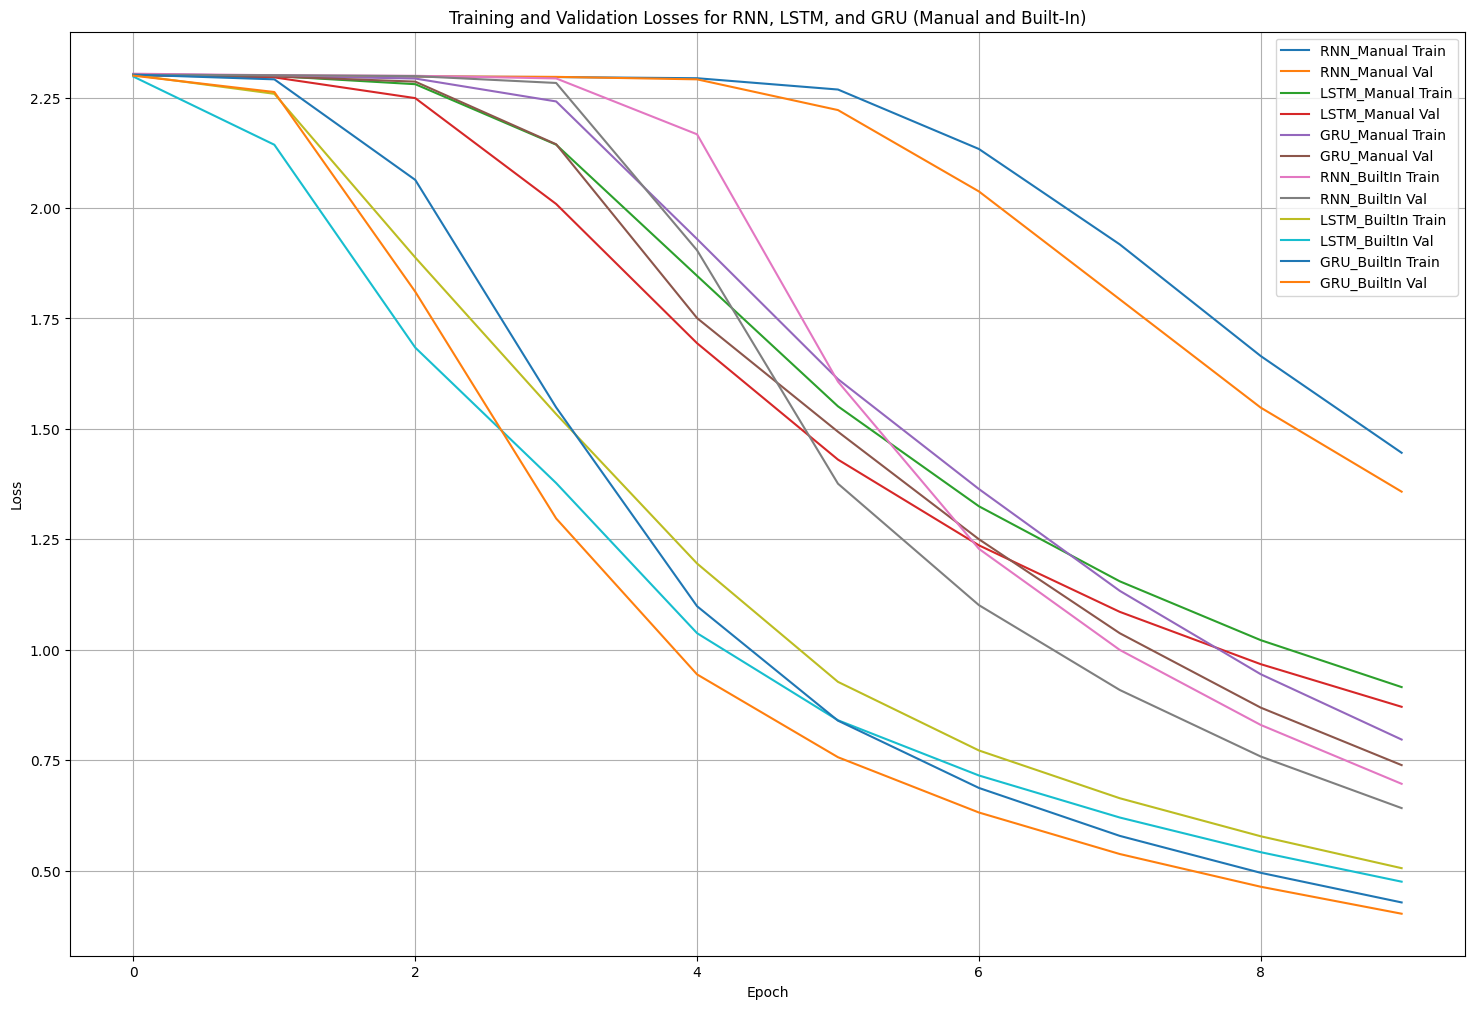


Final Validation Losses:
RNN_Manual: 1.3578
LSTM_Manual: 0.8707
GRU_Manual: 0.7387
RNN_BuiltIn: 0.6414
LSTM_BuiltIn: 0.4748
GRU_BuiltIn: 0.4022


In [1]:
"""
================================================= ===
RNN의 장기 종속성 문제 시연
================================================= ===
이 스크립트는 순환 신경망(RNN)에 내재된 장기 종속성 문제를 탐구합니다.
LSTM(Long Short-Term Memory) 및 GRU(Gated Recurrent Unit)와 같은 고급 아키텍처가 어떻게 사용되는지 보여줍니다.
이러한 과제를 해결하십시오. 실험에서는 다음과 같이 설계된 합성 데이터 세트인 Copy Task를 활용합니다.
확장된 시퀀스에 대한 정보를 유지하고 재현하는 모델의 능력을 테스트합니다.

주요 개념:
- 장기 의존성 문제: 기존 RNN은 긴 시퀀스에 걸쳐 정보를 유지하는 데 어려움을 겪습니다.
  관련 정보 간의 거리가 멀어질수록 성능 저하가 발생합니다.
- LSTM 및 GRU: 이러한 아키텍처는 유지 관리 및 관리를 허용하는 게이팅 메커니즘을 통합합니다.
  정보 흐름을 규제하여 장기적인 의존성 문제를 효과적으로 완화합니다.
- 복사 작업: 모델이 구분 기호 뒤의 입력 시퀀스를 재현해야 하는 간단하면서도 효과적인 작업입니다.
  이 설정은 긴 시퀀스를 기억하고 재현하는 모델의 기능을 평가하는 데 이상적입니다.

목적:
1. 데이터 세트 생성: 임베딩 레이어를 사용하지 않고 복사 작업을 위한 합성 데이터 세트를 생성합니다.
   각 모델 유형에 대해 두 가지 버전을 구현합니다.
   - 수동 구현: `nn.Linear` 레이어를 활용하여 모델 방정식을 직접 구현합니다.
   - 내장 구현: PyTorch의 내장 `nn.RNN`, `nn.LSTM` 및 `nn.GRU` 모듈 활용
     간소화된 모델 정의를 위한 임베딩 레이어가 있습니다.
2. 모델 정의: 수동 및 내장 구성 모두에서 RNN, LSTM 및 GRU 모델을 정의합니다.
3. 훈련 및 평가: 합성 데이터 세트에서 각 모델 변형을 훈련하고 성능을 평가합니다.
   LSTM과 GRU가 표준 RNN이 직면한 장기적인 종속성 문제를 어떻게 극복하는지 보여줍니다.
"""
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import random
import matplotlib.pyplot as plt
# Set random seeds for reproducibility 재현성을 위한 랜덤시드설정
torch.manual_seed(42)
random.seed(42)

def generate_dataset(num_samples, seq_length, vocab_size=3):
    """
    복사 작업을 위한 합성 데이터세트를 생성합니다.
    복사 작업에서 각 입력 시퀀스는 일련의 기호와 구분 기호로 구성됩니다.
    대상 시퀀스는 입력 시퀀스의 복사본(구분 기호가 없는 정확한 기호 시퀀스)입니다.
    인수:
        num_samples (int): 생성할 샘플 수를 지정
        seq_length (int): 구분 기호 앞에 있는 입력 시퀀스의 길이를 지정
        vocab_size (int, 선택사항): 고유 기호 수. 기본값은 3(0, 1, 구분 기호)입니다.
    보고:
        TensorDataset: 입력 및 대상 시퀀스를 포함하는 PyTorch TensorDataset입니다.
    """
    delimiter = vocab_size - 1  # 마지막 인덱스를 구분 기호로 가정합니다.
    inputs = []  # 입력 시퀀스를 저장할 리스트 초기화
    targets = []  # 대상 시퀀스를 저장할 리스트 초기화
    # num_samples 만큼 반복하여 입력 및 대상 시퀀스를 생성합니다.
    for _ in range(num_samples):
        # 입력 시퀀스 생성: 0부터 (vocab_size - 2)까지의 무작위 정수를 seq_length 만큼 생성
        input_seq = [random.randint(0, vocab_size - 2) for _ in range(seq_length)]
        input_seq.append(delimiter)  # 구분 기호 추가
        inputs.append(input_seq)  # 생성된 입력 시퀀스를 입력 리스트에 추가
        targets.append(input_seq)  # 생성된 입력 시퀀스를 대상 리스트에도 추가 (구분 기호 없이)
    # 입력 및 대상 리스트를 텐서로 변환
    inputs_tensor = torch.tensor(inputs, dtype=torch.long)  # 입력 시퀀스를 텐서로 변환
    targets_tensor = torch.tensor(targets, dtype=torch.long)  # 대상 시퀀스를 텐서로 변환
    # targets_tensor = indices_to_one_hot(targets_tensor, vocab_size)
    # TensorDataset을 생성하여 입력 및 대상 시퀀스를 포함
    dataset = TensorDataset(inputs_tensor, targets_tensor)  
    return dataset  # 생성된 데이터셋 반환

def generate_answer_mod_sum_prev_k(input_seq, mod, k):
    target_seq = []
    for i in range(len(input_seq)):
        if i < k:
            target_seq.append(sum(input_seq[:i+1]) % mod)
        else:
            target_seq.append(sum(input_seq[i-k+1:i+1]) % mod)
    return target_seq

def generate_dataset_mod_sum_prev_k(num_samples, seq_length, vocab_size=128, mod=10, k=4):
    """
    이전 k 요소의 모듈러 합에 대한 합성 데이터 세트를 생성합니다.
    Example:
        when = 4, mod = 10
        input = [0, 4, 5, 6, 7, 8]
        target = [0, 4, 9, 5, 2, 6]
    """
    inputs = []
    targets = []
    for _ in range(num_samples):
        input_seq = [random.randint(0, vocab_size - 1) for _ in range(seq_length)]
        target_seq = generate_answer_mod_sum_prev_k(input_seq, mod, k)
        inputs.append(input_seq)
        targets.append(target_seq)

    inputs_tensor = torch.tensor(inputs, dtype=torch.long)
    targets_tensor = torch.tensor(targets, dtype=torch.long)
    # targets_tensor = indices_to_one_hot(targets_tensor, mod)
    dataset = TensorDataset(inputs_tensor, targets_tensor)
    return dataset

def indices_to_one_hot(tensor, vocab_size):
    # Get the shape of the input tensor except the last dimension
    shape = tensor.shape[:-1]
    # Get the last dimension (which contains the vocabulary indices)
    last_dim = tensor.shape[-1]
    # Flatten the tensor except the last dimension
    tensor_flat = tensor.view(-1, last_dim)
    # Create the one-hot encoded tensor with shape (total_elements, vocab_size)
    one_hot_flat = torch.nn.functional.one_hot(tensor_flat, num_classes=vocab_size)
    # Reshape the one-hot encoded tensor back to the original dimensions + vocab_size
    one_hot_tensor = one_hot_flat.view(*shape, last_dim, vocab_size)
    return one_hot_tensor.float()
# ================================
# Manual Implementations
# ================================
class RNNManual(nn.Module):
    """
    ===================================
    Manual Recurrent Neural Network (RNN)
    ===================================
    Architecture:
        Input -> Input-to-Hidden (Linear) -> Tanh Activation -> Hidden-to-Hidden (Linear) -> Output (Linear)
    Formula:
        h_t = tanh(W_ih * x_t + W_hh * h_{t-1} + b_h)
        o_t = W_ho * h_t + b_o
    설명:
        이 클래스는 PyTorch의 내장 RNN 모듈을 사용하지 않고 간단한 RNN을 수동으로 구현합니다.
        선형 레이어를 사용하여 숨겨진 상태와 출력을 계산합니다.
    """
    def __init__(self, vocab_size, hidden_dim, output_dim):
        super(RNNManual, self).__init__()
        self.vocab_size = vocab_size
        self.hidden_dim = hidden_dim
        self.W_ih = nn.Linear(vocab_size, hidden_dim)  # Input to hidden
        self.W_hh = nn.Linear(hidden_dim, hidden_dim)  # Hidden to hidden
        self.W_ho = nn.Linear(hidden_dim, output_dim)  # Hidden to output

    def forward(self, x):
        """
        Forward pass for the manual RNN.
        Args:
            x (torch.Tensor): Input tensor of shape [batch_size, seq_length, vocab_size]
        Returns:
            torch.Tensor: Output logits of shape [batch_size, seq_length, output_dim]
        """
        x = indices_to_one_hot(x, self.vocab_size)
        batch_size, seq_length, _ = x.size()
        h_t = torch.zeros(batch_size, self.hidden_dim).to(x.device)
        outputs = []
        for t in range(seq_length):
            x_t = x[:, t, :]  # [batch_size, vocab_size]
            h_t = torch.tanh(self.W_ih(x_t) + self.W_hh(h_t))  # [batch_size, hidden_dim]
            o_t = self.W_ho(h_t)  # [batch_size, output_dim]
            outputs.append(o_t.unsqueeze(1))
        outputs = torch.cat(outputs, dim=1)  # [batch_size, seq_length, output_dim]
        return outputs

class LSTMManual(nn.Module):
    """
    ========================================
    Manual Long Short-Term Memory (LSTM)
    ========================================
    Architecture:
        Input -> Input Gates (Linear Layers) -> LSTM Cell -> Output (Linear)
    Formula:
        i_t = sigmoid(W_ii * x_t + W_hi * h_{t-1} + b_i)
        f_t = sigmoid(W_if * x_t + W_hf * h_{t-1} + b_f)
        g_t = tanh(W_ig * x_t + W_hg * h_{t-1} + b_g)
        o_t = sigmoid(W_io * x_t + W_ho * h_{t-1} + b_o)
        c_t = f_t * c_{t-1} + i_t * g_t
        h_t = o_t * tanh(c_t)
        y_t = W_ho * h_t + b_y
    Description:
        This class manually implements an LSTM cell without using PyTorch's built-in LSTM modules.
        It includes input, forget, cell, and output gates to regulate information flow.
    """
    def __init__(self, vocab_size, hidden_dim, output_dim):
        super(LSTMManual, self).__init__()
        self.vocab_size = vocab_size
        self.hidden_dim = hidden_dim
        # Input gate components
        self.W_ii = nn.Linear(vocab_size, hidden_dim)
        self.W_hi = nn.Linear(hidden_dim, hidden_dim)
        # Forget gate components
        self.W_if = nn.Linear(vocab_size, hidden_dim)
        self.W_hf = nn.Linear(hidden_dim, hidden_dim)
        # Cell gate components
        self.W_ig = nn.Linear(vocab_size, hidden_dim)
        self.W_hg = nn.Linear(hidden_dim, hidden_dim)
        # Output gate components
        self.W_io = nn.Linear(vocab_size, hidden_dim)
        self.W_ho = nn.Linear(hidden_dim, hidden_dim)
        # Output layer
        self.W_yo = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        """
        Forward pass for the manual LSTM.
        1. 데이터 세트 생성: 임베딩 레이어를 사용하지 않고 복사 작업을 위한 합성 데이터 세트를 생성합니다.
        우리는 각 모델 유형에 대해 두 가지 버전을 구현합니다.
        - 수동 구현: `nn.Linear` 레이어를 사용하여 모델 방정식을 직접 구현합니다.
        - 내장 구현: PyTorch의 내장 `nn.RNN`, `nn.LSTM` 및 `nn.GRU` 모듈을 활용합니다.
        단순화된 모델 정의를 위한 임베딩 레이어가 있습니다.
        Args:
            x (torch.Tensor): Input tensor of shape [batch_size, seq_length, vocab_size]
        Returns:
            torch.Tensor: Output logits of shape [batch_size, seq_length, output_dim]
        """
        x = indices_to_one_hot(x, self.vocab_size)
        batch_size, seq_length, _ = x.size()
        h_t = torch.zeros(batch_size, self.hidden_dim).to(x.device)
        c_t = torch.zeros(batch_size, self.hidden_dim).to(x.device)
        outputs = []
        for t in range(seq_length):
            x_t = x[:, t, :]  # [batch_size, vocab_size]
            i_t = torch.sigmoid(self.W_ii(x_t) + self.W_hi(h_t))  # Input gate
            f_t = torch.sigmoid(self.W_if(x_t) + self.W_hf(h_t))  # Forget gate
            g_t = torch.tanh(self.W_ig(x_t) + self.W_hg(h_t))     # Cell gate
            o_t = torch.sigmoid(self.W_io(x_t) + self.W_ho(h_t))  # Output gate
            c_t = f_t * c_t + i_t * g_t                            # Cell state
            h_t = o_t * torch.tanh(c_t)                            # Hidden state
            y_t = self.W_yo(h_t)                                    # Output
            outputs.append(y_t.unsqueeze(1))
        outputs = torch.cat(outputs, dim=1)  # [batch_size, seq_length, output_dim]
        return outputs

class GRUManual(nn.Module):
    """
    =======================================
    수동 게이트 순환 장치(GRU)
    =======================================
    Architecture:
        Input -> Update Gate (Linear Layers) -> Reset Gate (Linear Layers) -> GRU Cell -> Output (Linear)
    공식:
        z_t = sigmoid(W_iz * x_t + W_hz * h_{t-1} + b_z)
        r_t = sigmoid(W_ir * x_t + W_hr * h_{t-1} + b_r)
        n_t = tanh(W_in * x_t + W_hn * (r_t * h_{t-1}) + b_n)
        h_t = (1 - z_t) * n_t + z_t * h_{t-1}
        y_t = W_ho * h_t + b_y
    설명:
        이 클래스는 PyTorch의 내장 GRU 모듈을 사용하지 않고 GRU 셀을 수동으로 구현합니다.
        여기에는 정보 흐름을 제어하는 ​​업데이트 및 재설정 게이트가 포함됩니다.
    """
    def __init__(self, vocab_size, hidden_dim, output_dim):
        super(GRUManual, self).__init__()
        self.vocab_size = vocab_size
        self.hidden_dim = hidden_dim
        # Update gate
        self.W_iz = nn.Linear(vocab_size, hidden_dim)
        self.W_hz = nn.Linear(hidden_dim, hidden_dim)
        # Reset gate
        self.W_ir = nn.Linear(vocab_size, hidden_dim)
        self.W_hr = nn.Linear(hidden_dim, hidden_dim)
        # New gate
        self.W_in = nn.Linear(vocab_size, hidden_dim)
        self.W_hn = nn.Linear(hidden_dim, hidden_dim)
        # Output layer
        self.W_ho = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        """
        Forward pass for the manual GRU.
        Args:
            x (torch.Tensor): Input tensor of shape [batch_size, seq_length, vocab_size]
        Returns:
            torch.Tensor: Output logits of shape [batch_size, seq_length, output_dim]
        """
        x = indices_to_one_hot(x, self.vocab_size)
        batch_size, seq_length, _ = x.size()
        h_t = torch.zeros(batch_size, self.hidden_dim).to(x.device)
        outputs = []
        for t in range(seq_length):
            x_t = x[:, t, :]  # [batch_size, vocab_size]
            z_t = torch.sigmoid(self.W_iz(x_t) + self.W_hz(h_t))  # Update gate
            r_t = torch.sigmoid(self.W_ir(x_t) + self.W_hr(h_t))  # Reset gate
            n_t = torch.tanh(self.W_in(x_t) + self.W_hn(r_t * h_t))  # New gate
            h_t = (1 - z_t) * n_t + z_t * h_t  # Hidden state
            y_t = self.W_ho(h_t)  # Output
            outputs.append(y_t.unsqueeze(1))
        outputs = torch.cat(outputs, dim=1)  # [batch_size, seq_length, output_dim]
        return outputs
# ================================
# Built-In Implementations
# ================================
class RNNBuiltIn(nn.Module):
    """
    =======================================
    Built-In Recurrent Neural Network (RNN)
    =======================================
    Architecture:
        [Embedding] -> [nn.RNN] -> [Linear Output]
    Formula:
        h_t = RNN(x_t, h_{t-1})
        y_t = W_ho * h_t + b_o
    Description:
        이 클래스는 임베딩 레이어와 함께 PyTorch의 내장 `nn.RNN` 모듈을 활용합니다.
        'nn.RNN' 내에 반복 작업을 캡슐화하여 모델 정의를 단순화합니다.
    """
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(RNNBuiltIn, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        """
        Forward pass for the built-in RNN.
        Args:
            x (torch.Tensor): Input tensor of shape [batch_size, seq_length]
        Returns:
            torch.Tensor: Output logits of shape [batch_size, seq_length, output_dim]
        """
        embedded = self.embedding(x)  # [batch_size, seq_length, embedding_dim]
        output, hidden = self.rnn(embedded)  # output: [batch, seq, hidden], hidden: [1, batch, hidden]
        output = self.fc(output)  # [batch, seq, output_dim]
        return output

class LSTMBuiltIn(nn.Module):
    """
    ==========================================
    Built-In Long Short-Term Memory (LSTM)
    ==========================================
    Architecture:
        [Embedding] -> [nn.LSTM] -> [Linear Output]
    Formula:
        (h_t, c_t) = LSTM(x_t, (h_{t-1}, c_{t-1}))
        y_t = W_ho * h_t + b_o
    Description:
        이 클래스는 임베딩 레이어와 함께 PyTorch의 내장 `nn.LSTM` 모듈을 활용합니다.
        LSTM 게이트의 복잡성을 추상화하여 반복 작업을 위한 간소화된 인터페이스를 제공합니다.
    """
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(LSTMBuiltIn, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        """
        Forward pass for the built-in LSTM.
        Args:
            x (torch.Tensor): Input tensor of shape [batch_size, seq_length]
        Returns:
            torch.Tensor: Output logits of shape [batch_size, seq_length, output_dim]
        """
        embedded = self.embedding(x)  # [batch_size, seq_length, embedding_dim]
        output, (hidden, cell) = self.lstm(embedded)  # output: [batch, seq, hidden]
        output = self.fc(output)  # [batch, seq, output_dim]
        return output

class GRUBuiltIn(nn.Module):
    """
    ======================================
    Built-In Gated Recurrent Unit (GRU)
    ======================================
    Architecture:
        [Embedding] -> [nn.GRU] -> [Linear Output]
    Formula:
        h_t = GRU(x_t, h_{t-1})
        y_t = W_ho * h_t + b_o
    Description:
        이 클래스는 임베딩 레이어와 함께 PyTorch의 내장 `nn.GRU` 모듈을 사용합니다.
        이는 GRU의 게이팅 메커니즘을 캡슐화하여 반복 작업의 효율적인 구현을 제공합니다.
    """
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(GRUBuiltIn, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        """
        Forward pass for the built-in GRU.
        Args:
            x (torch.Tensor): Input tensor of shape [batch_size, seq_length]
        Returns:
            torch.Tensor: Output logits of shape [batch_size, seq_length, output_dim]
        """
        embedded = self.embedding(x)  # [batch_size, seq_length, embedding_dim]
        output, hidden = self.gru(embedded)  # output: [batch, seq, hidden], hidden: [1, batch, hidden]
        output = self.fc(output)  # [batch, seq, output_dim]
        return output
# ================================
# Training and Evaluation
# ================================
def train(model, dataloader, criterion, optimizer):
    """
    Trains the model for one epoch.

    Args:
        model (nn.Module): 훈련할 신경망 모델
        dataloader (DataLoader): DataLoader for the training data.
        criterion (nn.Module): Loss function.
        optimizer (optim.Optimizer): Optimization algorithm.
    Returns:
        float: Average training loss for the epoch.
    """
    model.train()
    epoch_loss = 0
    for inputs, targets in dataloader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    return epoch_loss / len(dataloader)

def evaluate(model, dataloader, criterion): # 평가
    """
    Evaluates the model on the validation dataset.
    Args:
        model (nn.Module): The neural network model to evaluate.
        dataloader (DataLoader): DataLoader for the validation data.
        criterion (nn.Module): Loss function.
    Returns:
        float: Average validation loss.
    """
    model.eval()
    epoch_loss = 0
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            epoch_loss += loss.item()
    return epoch_loss / len(dataloader)
# ================================
# Main Execution
# ================================
if __name__ == "__main__":
    # Hyperparameters
    VOCAB_SIZE = 16         # 단어집합 크기
    EMBEDDING_DIM = 8       # 임베딩 벡터 차원 : (벡터의 길이 설정) : (입력데이터 차원을 낮춰 표현)
    HIDDEN_DIM = 32         # 은닉층 벡터 차원
    OUTPUT_DIM = 10         # 출력층 벡터 차원 : 예측해야할 클래스(카테고리)개수
    SEQ_LENGTH = 50         # Length of the input sequence before the delimiter
    NUM_SAMPLES = 10000     # 샘플
    BATCH_SIZE = 64         # batch
    EPOCHS = 10             # epochs
    LEARNING_RATE = 0.001   # learning_rate
    LOOKBACK = 3            # 참조기간 : 시퀀스 데이터에서 과거의 몇 시점 까지 데이터정보를 참조 할지를 설정하는 값
    
    # Device configuration
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f'Using device: {device}')

    # Generate dataset
    # dataset = generate_dataset(NUM_SAMPLES, SEQ_LENGTH, VOCAB_SIZE)
    dataset = generate_dataset_mod_sum_prev_k(NUM_SAMPLES, SEQ_LENGTH, VOCAB_SIZE, OUTPUT_DIM, LOOKBACK)
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

    train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True)
    val_loader = DataLoader(val_dataset, batch_size = BATCH_SIZE, shuffle = False)
    
    # Initialize models
    # Manual Implementations
    rnn_manual = RNNManual(vocab_size = VOCAB_SIZE, hidden_dim = HIDDEN_DIM, output_dim = OUTPUT_DIM).to(device)
    lstm_manual = LSTMManual(vocab_size = VOCAB_SIZE, hidden_dim = HIDDEN_DIM, output_dim = OUTPUT_DIM).to(device)
    gru_manual = GRUManual(vocab_size = VOCAB_SIZE, hidden_dim = HIDDEN_DIM, output_dim = OUTPUT_DIM).to(device)

    # Built-In Implementations
    rnn_builtin = RNNBuiltIn(vocab_size = VOCAB_SIZE, embedding_dim = EMBEDDING_DIM,
                             hidden_dim = HIDDEN_DIM, output_dim = OUTPUT_DIM).to(device)
    lstm_builtin = LSTMBuiltIn(vocab_size = VOCAB_SIZE, embedding_dim = EMBEDDING_DIM,
                               hidden_dim = HIDDEN_DIM, output_dim = OUTPUT_DIM).to(device)
    gru_builtin = GRUBuiltIn(vocab_size = VOCAB_SIZE, embedding_dim = EMBEDDING_DIM,
                             hidden_dim = HIDDEN_DIM, output_dim = OUTPUT_DIM).to(device)

    # Define loss function
    # criterion = nn.CrossEntropyLoss()
    criterion = lambda x, y: torch.nn.functional.cross_entropy(x.permute(0, 2, 1), y)

    # Define optimizers
    optimizers = {
        'RNN_Manual': optim.Adam(rnn_manual.parameters(), lr = LEARNING_RATE),
        'LSTM_Manual': optim.Adam(lstm_manual.parameters(), lr = LEARNING_RATE),
        'GRU_Manual': optim.Adam(gru_manual.parameters(), lr = LEARNING_RATE),
        'RNN_BuiltIn': optim.Adam(rnn_builtin.parameters(), lr = LEARNING_RATE),
        'LSTM_BuiltIn': optim.Adam(lstm_builtin.parameters(), lr = LEARNING_RATE),
        'GRU_BuiltIn': optim.Adam(gru_builtin.parameters(), lr = LEARNING_RATE),
    }

    # Initialize loss tracking
    loss_history = {
        'RNN_Manual': {'train': [], 'val': []},
        'LSTM_Manual': {'train': [], 'val': []},
        'GRU_Manual': {'train': [], 'val': []},
        'RNN_BuiltIn': {'train': [], 'val': []},
        'LSTM_BuiltIn': {'train': [], 'val': []},
        'GRU_BuiltIn': {'train': [], 'val': []},
    }

    # Training loop
    for epoch in range(EPOCHS):
        print(f'\nEpoch {epoch+1}/{EPOCHS}')

        # Train RNN Manual
        train_loss = train(rnn_manual, train_loader, criterion, optimizers['RNN_Manual'])
        val_loss = evaluate(rnn_manual, val_loader, criterion)
        loss_history['RNN_Manual']['train'].append(train_loss)
        loss_history['RNN_Manual']['val'].append(val_loss)
        print(f'RNN Manual | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')

        # Train LSTM Manual
        train_loss = train(lstm_manual, train_loader, criterion, optimizers['LSTM_Manual'])
        val_loss = evaluate(lstm_manual, val_loader, criterion)
        loss_history['LSTM_Manual']['train'].append(train_loss)
        loss_history['LSTM_Manual']['val'].append(val_loss)
        print(f'LSTM Manual | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')

        # Train GRU Manual
        train_loss = train(gru_manual, train_loader, criterion, optimizers['GRU_Manual'])
        val_loss = evaluate(gru_manual, val_loader, criterion)
        loss_history['GRU_Manual']['train'].append(train_loss)
        loss_history['GRU_Manual']['val'].append(val_loss)
        print(f'GRU Manual | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')

        # Train RNN Built-In
        train_loss = train(rnn_builtin, train_loader, criterion, optimizers['RNN_BuiltIn'])
        val_loss = evaluate(rnn_builtin, val_loader, criterion)
        loss_history['RNN_BuiltIn']['train'].append(train_loss)
        loss_history['RNN_BuiltIn']['val'].append(val_loss)
        print(f'RNN Built-In | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')

        # Train LSTM Built-In
        train_loss = train(lstm_builtin, train_loader, criterion, optimizers['LSTM_BuiltIn'])
        val_loss = evaluate(lstm_builtin, val_loader, criterion)
        loss_history['LSTM_BuiltIn']['train'].append(train_loss)
        loss_history['LSTM_BuiltIn']['val'].append(val_loss)
        print(f'LSTM Built-In | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')

        # Train GRU Built-In
        train_loss = train(gru_builtin, train_loader, criterion, optimizers['GRU_BuiltIn'])
        val_loss = evaluate(gru_builtin, val_loader, criterion)
        loss_history['GRU_BuiltIn']['train'].append(train_loss)
        loss_history['GRU_BuiltIn']['val'].append(val_loss)
        print(f'GRU Built-In | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')


    # Plotting the loss curves
    plt.figure(figsize=(18, 12))
    for model_name in loss_history:
        plt.plot(loss_history[model_name]['train'], label=f'{model_name} Train')
        plt.plot(loss_history[model_name]['val'], label=f'{model_name} Val')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Losses for RNN, LSTM, and GRU (Manual and Built-In)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Display final validation losses
    print("\nFinal Validation Losses:")
    for model_name in loss_history:
        final_val_loss = loss_history[model_name]['val'][-1]
        print(f'{model_name}: {final_val_loss:.4f}')

In [ ]:
"""
=====================================================
Demonstrating Long-Term Dependency Problems in RNNs
=====================================================

This script explores the long-term dependency problem inherent in Recurrent Neural Networks (RNNs)
and showcases how advanced architectures like Long Short-Term Memory (LSTM) and Gated Recurrent Units (GRUs)
address these challenges. The experiment utilizes the Copy Task, a synthetic dataset designed to
test a model's ability to retain and reproduce information over extended sequences.

Key Concepts:

- Long-Term Dependency Problem: Traditional RNNs struggle to retain information over long sequences,
  leading to performance degradation as the distance between relevant information increases.

- LSTM and GRU: These architectures incorporate gating mechanisms that allow them to maintain and
  regulate information flow, effectively mitigating the long-term dependency problem.

- Copy Task: A simple yet effective task where the model must reproduce an input sequence after a delimiter.
  This setup is ideal for evaluating a model's capability to remember and reproduce long sequences.

Objective:

1. Dataset Generation: Create a synthetic dataset for the Copy Task without using embedding layers.
   Implement two versions for each model type:
   - Manual Implementation: Utilize `nn.Linear` layers to directly implement the model equations.
   - Built-In Implementation: Leverage PyTorch's built-in `nn.RNN`, `nn.LSTM`, and `nn.GRU` modules
     with embedding layers for streamlined model definitions.

2. Model Definitions: Define RNN, LSTM, and GRU models in both manual and built-in configurations.

3. Training and Evaluation: Train each model variant on the synthetic dataset and evaluate their performance
   to demonstrate how LSTM and GRU overcome the long-term dependency issues faced by standard RNNs.

"""

import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import random
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
torch.manual_seed(42)
random.seed(42)

def generate_dataset(num_samples, seq_length, vocab_size=3):
    """
    Generates a synthetic dataset for the Copy Task.

    In the Copy Task, each input sequence consists of a series of symbols followed by a delimiter.
    The target sequence is the exact sequence of symbols without the delimiter.

    Args:
        num_samples (int): Number of samples to generate.
        seq_length (int): Length of the input sequence before the delimiter.
        vocab_size (int, optional): Number of unique symbols. Defaults to 3 (0, 1, delimiter).

    Returns:
        TensorDataset: A PyTorch TensorDataset containing input and target sequences.
    """
    delimiter = vocab_size - 1  # Assuming the last index is the delimiter
    inputs = []
    targets = []
    for _ in range(num_samples):
        input_seq = [random.randint(0, vocab_size - 2) for _ in range(seq_length)]
        input_seq.append(delimiter)
        inputs.append(input_seq)
        targets.append(input_seq)

    inputs_tensor = torch.tensor(inputs, dtype=torch.long)
    targets_tensor = torch.tensor(targets, dtype=torch.long)
    # targets_tensor = indices_to_one_hot(targets_tensor, vocab_size)
    dataset = TensorDataset(inputs_tensor, targets_tensor)
    return dataset


def generate_answer_mod_sum_prev_k(input_seq, mod, k):
    target_seq = []
    for i in range(len(input_seq)):
        if i < k:
            target_seq.append(sum(input_seq[:i+1]) % mod)
        else:
            target_seq.append(sum(input_seq[i-k+1:i+1]) % mod)
    return target_seq


def generate_dataset_mod_sum_prev_k(num_samples, seq_length, vocab_size=128, mod=10, k=4):
    """
    Generates a synthetic dataset for modular sum of previoous k elements

    Example:
        when = 4, mod = 10
        input = [0, 4, 5, 6, 7, 8]
        target = [0, 4, 9, 5, 2, 6]
    """
    inputs = []
    targets = []
    for _ in range(num_samples):
        input_seq = [random.randint(0, vocab_size - 1) for _ in range(seq_length)]
        target_seq = generate_answer_mod_sum_prev_k(input_seq, mod, k)

        inputs.append(input_seq)
        targets.append(target_seq)


    inputs_tensor = torch.tensor(inputs, dtype=torch.long)
    targets_tensor = torch.tensor(targets, dtype=torch.long)
    # targets_tensor = indices_to_one_hot(targets_tensor, mod)
    dataset = TensorDataset(inputs_tensor, targets_tensor)
    return dataset


def indices_to_one_hot(tensor, vocab_size):
    # Get the shape of the input tensor except the last dimension
    shape = tensor.shape[:-1]

    # Get the last dimension (which contains the vocabulary indices)
    last_dim = tensor.shape[-1]

    # Flatten the tensor except the last dimension
    tensor_flat = tensor.view(-1, last_dim)

    # Create the one-hot encoded tensor with shape (total_elements, vocab_size)
    one_hot_flat = torch.nn.functional.one_hot(tensor_flat, num_classes=vocab_size)

    # Reshape the one-hot encoded tensor back to the original dimensions + vocab_size
    one_hot_tensor = one_hot_flat.view(*shape, last_dim, vocab_size)

    return one_hot_tensor.float()


# ================================
# Manual Implementations
# ================================

class RNNManual(nn.Module):
    """
    ===================================
    Manual Recurrent Neural Network (RNN)
    ===================================

    Architecture:
        Input -> Input-to-Hidden (Linear) -> Tanh Activation -> Hidden-to-Hidden (Linear) -> Output (Linear)

    Formula:
        h_t = tanh(W_ih * x_t + W_hh * h_{t-1} + b_h)
        o_t = W_ho * h_t + b_o

    Description:
        This class manually implements a simple RNN without using PyTorch's built-in RNN modules.
        It uses linear layers to compute the hidden states and outputs.
    """
    def __init__(self, vocab_size, hidden_dim, output_dim):
        super(RNNManual, self).__init__()
        self.vocab_size = vocab_size
        self.hidden_dim = hidden_dim
        self.W_ih = nn.Linear(vocab_size, hidden_dim)  # Input to hidden
        self.W_hh = nn.Linear(hidden_dim, hidden_dim)  # Hidden to hidden
        self.W_ho = nn.Linear(hidden_dim, output_dim)  # Hidden to output

    def forward(self, x):
        """
        Forward pass for the manual RNN.

        Args:
            x (torch.Tensor): Input tensor of shape [batch_size, seq_length, vocab_size]

        Returns:
            torch.Tensor: Output logits of shape [batch_size, seq_length, output_dim]
        """
        x = indices_to_one_hot(x, self.vocab_size)
        batch_size, seq_length, _ = x.size()
        h_t = torch.zeros(batch_size, self.hidden_dim).to(x.device)
        outputs = []
        for t in range(seq_length):
            x_t = x[:, t, :]  # [batch_size, vocab_size]
            h_t = torch.tanh(self.W_ih(x_t) + self.W_hh(h_t))  # [batch_size, hidden_dim]
            o_t = self.W_ho(h_t)  # [batch_size, output_dim]
            outputs.append(o_t.unsqueeze(1))
        outputs = torch.cat(outputs, dim=1)  # [batch_size, seq_length, output_dim]
        return outputs

class LSTMManual(nn.Module):
    """
    ========================================
    Manual Long Short-Term Memory (LSTM)
    ========================================

    Architecture:
        Input -> Input Gates (Linear Layers) -> LSTM Cell -> Output (Linear)

    Formula:
        i_t = sigmoid(W_ii * x_t + W_hi * h_{t-1} + b_i)
        f_t = sigmoid(W_if * x_t + W_hf * h_{t-1} + b_f)
        g_t = tanh(W_ig * x_t + W_hg * h_{t-1} + b_g)
        o_t = sigmoid(W_io * x_t + W_ho * h_{t-1} + b_o)
        c_t = f_t * c_{t-1} + i_t * g_t
        h_t = o_t * tanh(c_t)
        y_t = W_ho * h_t + b_y

    Description:
        This class manually implements an LSTM cell without using PyTorch's built-in LSTM modules.
        It includes input, forget, cell, and output gates to regulate information flow.
    """
    def __init__(self, vocab_size, hidden_dim, output_dim):
        super(LSTMManual, self).__init__()
        self.vocab_size = vocab_size
        self.hidden_dim = hidden_dim
        # Input gate components
        self.W_ii = nn.Linear(vocab_size, hidden_dim)
        self.W_hi = nn.Linear(hidden_dim, hidden_dim)
        # Forget gate components
        self.W_if = nn.Linear(vocab_size, hidden_dim)
        self.W_hf = nn.Linear(hidden_dim, hidden_dim)
        # Cell gate components
        self.W_ig = nn.Linear(vocab_size, hidden_dim)
        self.W_hg = nn.Linear(hidden_dim, hidden_dim)
        # Output gate components
        self.W_io = nn.Linear(vocab_size, hidden_dim)
        self.W_ho = nn.Linear(hidden_dim, hidden_dim)
        # Output layer
        self.W_yo = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        """
        Forward pass for the manual LSTM.

        Args:
            x (torch.Tensor): Input tensor of shape [batch_size, seq_length, vocab_size]

        Returns:
            torch.Tensor: Output logits of shape [batch_size, seq_length, output_dim]
        """
        x = indices_to_one_hot(x, self.vocab_size)
        batch_size, seq_length, _ = x.size()
        h_t = torch.zeros(batch_size, self.hidden_dim).to(x.device)
        c_t = torch.zeros(batch_size, self.hidden_dim).to(x.device)
        outputs = []
        for t in range(seq_length):
            x_t = x[:, t, :]  # [batch_size, vocab_size]
            i_t = torch.sigmoid(self.W_ii(x_t) + self.W_hi(h_t))  # Input gate
            f_t = torch.sigmoid(self.W_if(x_t) + self.W_hf(h_t))  # Forget gate
            g_t = torch.tanh(self.W_ig(x_t) + self.W_hg(h_t))     # Cell gate
            o_t = torch.sigmoid(self.W_io(x_t) + self.W_ho(h_t))  # Output gate
            c_t = f_t * c_t + i_t * g_t                            # Cell state
            h_t = o_t * torch.tanh(c_t)                            # Hidden state
            y_t = self.W_yo(h_t)                                    # Output
            outputs.append(y_t.unsqueeze(1))
        outputs = torch.cat(outputs, dim=1)  # [batch_size, seq_length, output_dim]
        return outputs

class GRUManual(nn.Module):
    """
    =======================================
    Manual Gated Recurrent Unit (GRU)
    =======================================

    Architecture:
        Input -> Update Gate (Linear Layers) -> Reset Gate (Linear Layers) -> GRU Cell -> Output (Linear)

    Formula:
        z_t = sigmoid(W_iz * x_t + W_hz * h_{t-1} + b_z)
        r_t = sigmoid(W_ir * x_t + W_hr * h_{t-1} + b_r)
        n_t = tanh(W_in * x_t + W_hn * (r_t * h_{t-1}) + b_n)
        h_t = (1 - z_t) * n_t + z_t * h_{t-1}
        y_t = W_ho * h_t + b_y

    Description:
        This class manually implements a GRU cell without using PyTorch's built-in GRU modules.
        It includes update and reset gates to control the flow of information.
    """
    def __init__(self, vocab_size, hidden_dim, output_dim):
        super(GRUManual, self).__init__()
        self.vocab_size = vocab_size
        self.hidden_dim = hidden_dim
        # Update gate
        self.W_iz = nn.Linear(vocab_size, hidden_dim)
        self.W_hz = nn.Linear(hidden_dim, hidden_dim)
        # Reset gate
        self.W_ir = nn.Linear(vocab_size, hidden_dim)
        self.W_hr = nn.Linear(hidden_dim, hidden_dim)
        # New gate
        self.W_in = nn.Linear(vocab_size, hidden_dim)
        self.W_hn = nn.Linear(hidden_dim, hidden_dim)
        # Output layer
        self.W_ho = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        """
        Forward pass for the manual GRU.

        Args:
            x (torch.Tensor): Input tensor of shape [batch_size, seq_length, vocab_size]

        Returns:
            torch.Tensor: Output logits of shape [batch_size, seq_length, output_dim]
        """
        x = indices_to_one_hot(x, self.vocab_size)
        batch_size, seq_length, _ = x.size()
        h_t = torch.zeros(batch_size, self.hidden_dim).to(x.device)
        outputs = []
        for t in range(seq_length):
            x_t = x[:, t, :]  # [batch_size, vocab_size]
            z_t = torch.sigmoid(self.W_iz(x_t) + self.W_hz(h_t))  # Update gate
            r_t = torch.sigmoid(self.W_ir(x_t) + self.W_hr(h_t))  # Reset gate
            n_t = torch.tanh(self.W_in(x_t) + self.W_hn(r_t * h_t))  # New gate
            h_t = (1 - z_t) * n_t + z_t * h_t  # Hidden state
            y_t = self.W_ho(h_t)  # Output
            outputs.append(y_t.unsqueeze(1))
        outputs = torch.cat(outputs, dim=1)  # [batch_size, seq_length, output_dim]
        return outputs

# ================================
# Built-In Implementations
# ================================

class RNNBuiltIn(nn.Module):
    """
    =======================================
    Built-In Recurrent Neural Network (RNN)
    =======================================

    Architecture:
        [Embedding] -> [nn.RNN] -> [Linear Output]

    Formula:
        h_t = RNN(x_t, h_{t-1})
        y_t = W_ho * h_t + b_o

    Description:
        This class leverages PyTorch's built-in `nn.RNN` module along with an embedding layer.
        It simplifies the model definition by encapsulating the recurrent operations within `nn.RNN`.
    """
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(RNNBuiltIn, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        """
        Forward pass for the built-in RNN.

        Args:
            x (torch.Tensor): Input tensor of shape [batch_size, seq_length]

        Returns:
            torch.Tensor: Output logits of shape [batch_size, seq_length, output_dim]
        """
        embedded = self.embedding(x)  # [batch_size, seq_length, embedding_dim]
        output, hidden = self.rnn(embedded)  # output: [batch, seq, hidden], hidden: [1, batch, hidden]
        output = self.fc(output)  # [batch, seq, output_dim]
        return output

class LSTMBuiltIn(nn.Module):
    """
    ==========================================
    Built-In Long Short-Term Memory (LSTM)
    ==========================================

    Architecture:
        [Embedding] -> [nn.LSTM] -> [Linear Output]

    Formula:
        (h_t, c_t) = LSTM(x_t, (h_{t-1}, c_{t-1}))
        y_t = W_ho * h_t + b_o

    Description:
        This class utilizes PyTorch's built-in `nn.LSTM` module along with an embedding layer.
        It abstracts the complexities of LSTM gates, providing a streamlined interface for recurrent operations.
    """
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(LSTMBuiltIn, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        """
        Forward pass for the built-in LSTM.

        Args:
            x (torch.Tensor): Input tensor of shape [batch_size, seq_length]

        Returns:
            torch.Tensor: Output logits of shape [batch_size, seq_length, output_dim]
        """
        embedded = self.embedding(x)  # [batch_size, seq_length, embedding_dim]
        output, (hidden, cell) = self.lstm(embedded)  # output: [batch, seq, hidden]
        output = self.fc(output)  # [batch, seq, output_dim]
        return output

class GRUBuiltIn(nn.Module):
    """
    ======================================
    Built-In Gated Recurrent Unit (GRU)
    ======================================

    Architecture:
        [Embedding] -> [nn.GRU] -> [Linear Output]

    Formula:
        h_t = GRU(x_t, h_{t-1})
        y_t = W_ho * h_t + b_o

    Description:
        This class employs PyTorch's built-in `nn.GRU` module along with an embedding layer.
        It encapsulates the GRU's gating mechanisms, providing an efficient implementation of recurrent operations.
    """
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(GRUBuiltIn, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        """
        Forward pass for the built-in GRU.

        Args:
            x (torch.Tensor): Input tensor of shape [batch_size, seq_length]

        Returns:
            torch.Tensor: Output logits of shape [batch_size, seq_length, output_dim]
        """
        embedded = self.embedding(x)  # [batch_size, seq_length, embedding_dim]
        output, hidden = self.gru(embedded)  # output: [batch, seq, hidden], hidden: [1, batch, hidden]
        output = self.fc(output)  # [batch, seq, output_dim]
        return output

# ================================
# Training and Evaluation
# ================================

def train(model, dataloader, criterion, optimizer):
    """
    Trains the model for one epoch.

    Args:
        model (nn.Module): The neural network model to train.
        dataloader (DataLoader): DataLoader for the training data.
        criterion (nn.Module): Loss function.
        optimizer (optim.Optimizer): Optimization algorithm.

    Returns:
        float: Average training loss for the epoch.
    """
    model.train()
    epoch_loss = 0
    for inputs, targets in dataloader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    return epoch_loss / len(dataloader)

def evaluate(model, dataloader, criterion):
    """
    Evaluates the model on the validation dataset.

    Args:
        model (nn.Module): The neural network model to evaluate.
        dataloader (DataLoader): DataLoader for the validation data.
        criterion (nn.Module): Loss function.

    Returns:
        float: Average validation loss.
    """
    model.eval()
    epoch_loss = 0
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            epoch_loss += loss.item()
    return epoch_loss / len(dataloader)

# ================================
# Main Execution
# ================================

if __name__ == "__main__":
    # Hyperparameters
    VOCAB_SIZE = 16
    EMBEDDING_DIM = 8
    HIDDEN_DIM = 32
    OUTPUT_DIM = 10
    SEQ_LENGTH = 50  # Length of the input sequence before the delimiter
    NUM_SAMPLES = 10000
    BATCH_SIZE = 64
    EPOCHS = 10
    LEARNING_RATE = 0.001
    LOOKBACK = 3

    # Device configuration
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f'Using device: {device}')

    # Generate dataset
    # dataset = generate_dataset(NUM_SAMPLES, SEQ_LENGTH, VOCAB_SIZE)
    dataset = generate_dataset_mod_sum_prev_k(NUM_SAMPLES, SEQ_LENGTH, VOCAB_SIZE, OUTPUT_DIM, LOOKBACK)
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

    train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True)
    val_loader = DataLoader(val_dataset, batch_size = BATCH_SIZE, shuffle = False)

    # Initialize models
    # Manual Implementations
    rnn_manual = RNNManual(vocab_size = VOCAB_SIZE, hidden_dim = HIDDEN_DIM, output_dim = OUTPUT_DIM).to(device)
    lstm_manual = LSTMManual(vocab_size = VOCAB_SIZE, hidden_dim = HIDDEN_DIM, output_dim = OUTPUT_DIM).to(device)
    gru_manual = GRUManual(vocab_size = VOCAB_SIZE, hidden_dim = HIDDEN_DIM, output_dim = OUTPUT_DIM).to(device)

    # Built-In Implementations
    rnn_builtin = RNNBuiltIn(vocab_size = VOCAB_SIZE, embedding_dim = EMBEDDING_DIM,
                             hidden_dim = HIDDEN_DIM, output_dim = OUTPUT_DIM).to(device)
    lstm_builtin = LSTMBuiltIn(vocab_size = VOCAB_SIZE, embedding_dim = EMBEDDING_DIM,
                               hidden_dim = HIDDEN_DIM, output_dim = OUTPUT_DIM).to(device)
    gru_builtin = GRUBuiltIn(vocab_size = VOCAB_SIZE, embedding_dim = EMBEDDING_DIM,
                             hidden_dim = HIDDEN_DIM, output_dim = OUTPUT_DIM).to(device)

    # Define loss function
    # criterion = nn.CrossEntropyLoss()
    criterion = lambda x, y: torch.nn.functional.cross_entropy(x.permute(0, 2, 1), y)

    # Define optimizers
    optimizers = {
        'RNN_Manual': optim.Adam(rnn_manual.parameters(), lr = LEARNING_RATE),
        'LSTM_Manual': optim.Adam(lstm_manual.parameters(), lr = LEARNING_RATE),
        'GRU_Manual': optim.Adam(gru_manual.parameters(), lr = LEARNING_RATE),
        'RNN_BuiltIn': optim.Adam(rnn_builtin.parameters(), lr = LEARNING_RATE),
        'LSTM_BuiltIn': optim.Adam(lstm_builtin.parameters(), lr = LEARNING_RATE),
        'GRU_BuiltIn': optim.Adam(gru_builtin.parameters(), lr = LEARNING_RATE),
    }

    # Initialize loss tracking
    loss_history = {
        'RNN_Manual': {'train': [], 'val': []},
        'LSTM_Manual': {'train': [], 'val': []},
        'GRU_Manual': {'train': [], 'val': []},
        'RNN_BuiltIn': {'train': [], 'val': []},
        'LSTM_BuiltIn': {'train': [], 'val': []},
        'GRU_BuiltIn': {'train': [], 'val': []},
    }

    # Training loop
    for epoch in range(EPOCHS):
        print(f'\nEpoch {epoch+1}/{EPOCHS}')

        # Train RNN Manual
        train_loss = train(rnn_manual, train_loader, criterion, optimizers['RNN_Manual'])
        val_loss = evaluate(rnn_manual, val_loader, criterion)
        loss_history['RNN_Manual']['train'].append(train_loss)
        loss_history['RNN_Manual']['val'].append(val_loss)
        print(f'RNN Manual | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')

        # Train LSTM Manual
        train_loss = train(lstm_manual, train_loader, criterion, optimizers['LSTM_Manual'])
        val_loss = evaluate(lstm_manual, val_loader, criterion)
        loss_history['LSTM_Manual']['train'].append(train_loss)
        loss_history['LSTM_Manual']['val'].append(val_loss)
        print(f'LSTM Manual | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')

        # Train GRU Manual
        train_loss = train(gru_manual, train_loader, criterion, optimizers['GRU_Manual'])
        val_loss = evaluate(gru_manual, val_loader, criterion)
        loss_history['GRU_Manual']['train'].append(train_loss)
        loss_history['GRU_Manual']['val'].append(val_loss)
        print(f'GRU Manual | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')

        # Train RNN Built-In
        train_loss = train(rnn_builtin, train_loader, criterion, optimizers['RNN_BuiltIn'])
        val_loss = evaluate(rnn_builtin, val_loader, criterion)
        loss_history['RNN_BuiltIn']['train'].append(train_loss)
        loss_history['RNN_BuiltIn']['val'].append(val_loss)
        print(f'RNN Built-In | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')

        # Train LSTM Built-In
        train_loss = train(lstm_builtin, train_loader, criterion, optimizers['LSTM_BuiltIn'])
        val_loss = evaluate(lstm_builtin, val_loader, criterion)
        loss_history['LSTM_BuiltIn']['train'].append(train_loss)
        loss_history['LSTM_BuiltIn']['val'].append(val_loss)
        print(f'LSTM Built-In | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')

        # Train GRU Built-In
        train_loss = train(gru_builtin, train_loader, criterion, optimizers['GRU_BuiltIn'])
        val_loss = evaluate(gru_builtin, val_loader, criterion)
        loss_history['GRU_BuiltIn']['train'].append(train_loss)
        loss_history['GRU_BuiltIn']['val'].append(val_loss)
        print(f'GRU Built-In | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')



    # Plotting the loss curves
    plt.figure(figsize=(18, 12))
    for model_name in loss_history:
        plt.plot(loss_history[model_name]['train'], label=f'{model_name} Train')
        plt.plot(loss_history[model_name]['val'], label=f'{model_name} Val')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Losses for RNN, LSTM, and GRU (Manual and Built-In)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Display final validation losses
    print("\nFinal Validation Losses:")
    for model_name in loss_history:
        final_val_loss = loss_history[model_name]['val'][-1]
        print(f'{model_name}: {final_val_loss:.4f}')

In [ ]:
test_in = torch.tensor([[1, 2, 3, 4, 5, 6, 7, 8, 15]])
print(test_in)
print(torch.tensor(generate_answer_mod_sum_prev_k(test_in[0], OUTPUT_DIM, LOOKBACK)))
with torch.no_grad():
    for model in [rnn_manual, lstm_manual, gru_manual, rnn_builtin, lstm_builtin, gru_builtin]:
        test_out = model(test_in)
        values, indices = test_out.max(dim=-1)
        print(indices)

---
# 연습만이 살 길 --- 완전하게 실습
---

Using device: cpu


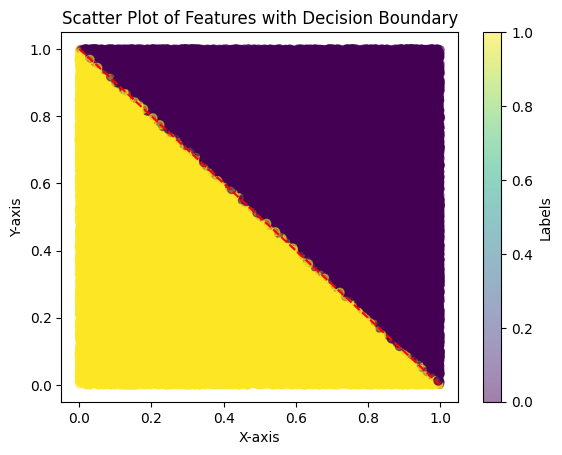


Epoch 1/10
Model | Train Loss: 0.28189 | Valid Loss: 0.12315
Model | Train Accuracy: 94.22% | Valid Accuracy: 98.94%

Epoch 2/10
Model | Train Loss: 0.09527 | Valid Loss: 0.07521
Model | Train Accuracy: 99.34% | Valid Accuracy: 99.30%

Epoch 3/10
Model | Train Loss: 0.06534 | Valid Loss: 0.05709
Model | Train Accuracy: 99.54% | Valid Accuracy: 99.20%

Epoch 4/10
Model | Train Loss: 0.05139 | Valid Loss: 0.04707
Model | Train Accuracy: 99.60% | Valid Accuracy: 99.28%

Epoch 5/10
Model | Train Loss: 0.04294 | Valid Loss: 0.03997
Model | Train Accuracy: 99.62% | Valid Accuracy: 99.83%

Epoch 6/10
Model | Train Loss: 0.03729 | Valid Loss: 0.03540
Model | Train Accuracy: 99.64% | Valid Accuracy: 99.70%

Epoch 7/10
Model | Train Loss: 0.03313 | Valid Loss: 0.03322
Model | Train Accuracy: 99.69% | Valid Accuracy: 99.31%

Epoch 8/10
Model | Train Loss: 0.02999 | Valid Loss: 0.02915
Model | Train Accuracy: 99.71% | Valid Accuracy: 99.90%

Epoch 9/10
Model | Train Loss: 0.02761 | Valid Loss: 0.

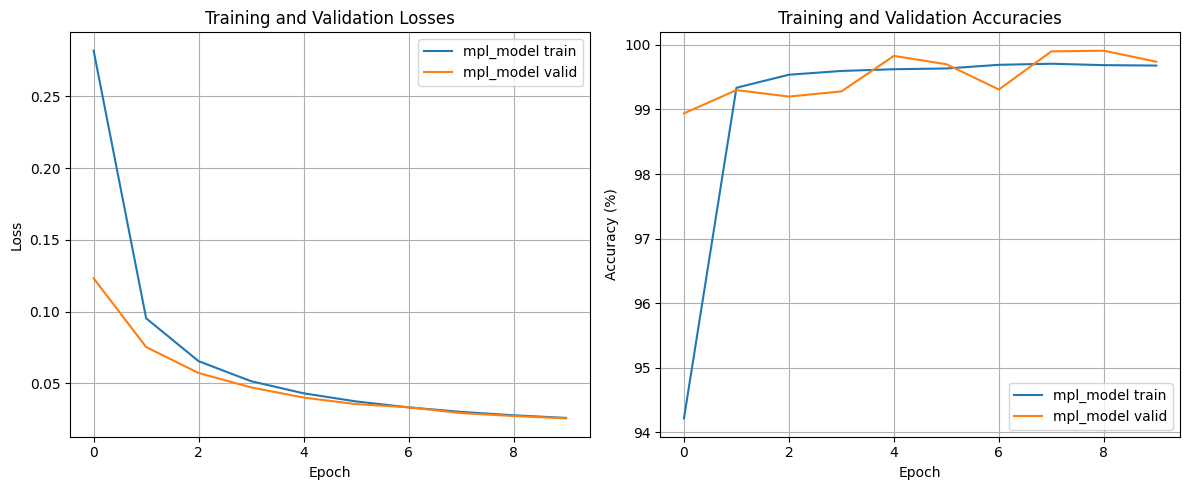

validation loss
mpl_model: 0.02549


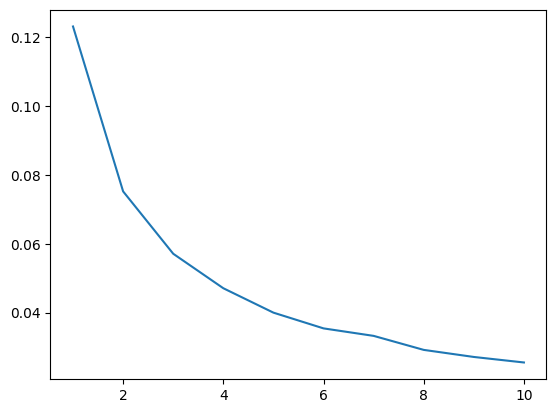

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt
import random
'''
def generate_data(n_samples=10000, x_amplitude = 1.5, noise_amplitude = 1, batch_size = 32):
    # 표준정규분포(평0, 표준편차1)인 난수샘플 n_samples개의 1차원텐서 생성 : 표준편차 x_amplitude 배
    X = torch.randn(n_samples, 1) * x_amplitude
    noise = torch.randn(n_samples, 1) * noise_amplitude # noise 생성
    y = 3*X + 4 + noise # 생성값 y = 3x + 4 + (노이즈)첨가
    
    dataset = TensorDataset(X, y) # X,y를 하나의 dataset으로 병합
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    return dataloader
'''
def generate_classification(sample_n=10000): # x + y < 1 classification data
    x = torch.rand(sample_n, 1)
    y = torch.rand(sample_n, 1)
    features = torch.cat((x, y), dim=1)
    labels = (x + y < 1).int()
    dataset = TensorDataset(features, labels)
    plot_data(features, labels)
    return dataset

# 데이터 분할
def split_dataset(data_set, train_ratio=0.6, valid_ratio=0.1):
    data_size = len(data_set)
    train_size = int(data_size * train_ratio)
    valid_size = int(data_size * valid_ratio)
    test_size = data_size - train_size - valid_size
    train_dataset, valid_dataset, test_dataset = random_split(data_set, [train_size, valid_size, test_size])
    return train_dataset, valid_dataset, test_dataset


def plot_data(features, labels):
    x = features[:, 0]
    y = features[:, 1]  # 두 번째 특성 (Tensor)
    labels = labels.squeeze()
    
    plt.scatter(x, y, c=labels, cmap='viridis', alpha=0.5)
    boundary_x = torch.linspace(0, 1, 100)  # 0부터 1까지 100개의 값을 생성
    boundary_y = 1 - boundary_x
    
    plt.plot(boundary_x, boundary_y, 'r--', label='x + y = 1')
    
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Scatter Plot of Features with Decision Boundary')
    plt.colorbar(label='Labels')
    plt.show()
    
def plot_loss_history(loss_history):
    plt.plot(range(1, len(loss_history)+1), loss_history)
    plt.show()
    
# 모델정의
class MyFeedforwardmodule(nn.Module): # -x+y < 1 classification module
    def __init__(self, input_size, hidden_size, output_size):
        super(MyFeedforwardmodule, self).__init__()
        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2h = nn.Linear(hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        # self.relu = nn.ReLU()
    
    def forward(self, input):
        i2h_out = torch.relu(self.i2h(input))
        # i2h_out = self.relu(self.i2h(input))
        h2h_out = torch.relu(self.h2h(i2h_out))
        h2o_out = self.h2o(i2h_out)
        return h2o_out

def train(model, dataloader, loss_function, optimizer, ):
    model.train()
    epoch_loss = 0
    correct = 0
    total = 0
    for inputs, targets in dataloader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()                                       # 이전 배치에서 계산된 기울기 초기화
        outputs = model(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets.squeeze(1)).sum().item()
        
    accuracy = 100 * correct / total
    average_loss = epoch_loss / len(dataloader)
    
    return average_loss, accuracy

def evaluate(model, dataloader, loss_function):
    model.eval()
    epoch_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = loss_function(outputs, targets)
            
            epoch_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets.squeeze(1)).sum().item()
    
    accuracy = 100 * correct / total
    average_loss = epoch_loss / len(dataloader)
    
    return average_loss, accuracy

if __name__ == "__main__":
    # Hyperparameters
    VOCAB_SIZE = 2
    EMBEDDING_DIM = 8 # ?
    HIDDEN_DIM = 32
    OUTPUT_DIM = 2
    SEQ_LENGTH = 50  # Length of the input sequence before the delimiter
    NUM_SAMPLES = 100000
    BATCH_SIZE = 64
    EPOCHS = 10
    LEARNING_RATE = 0.001
    LOOKBACK = 3
    TRAIN_RATIO, VALID_RATIO = 0.6, 0.1
    # Device configuration print # cuda/cpu
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f'Using device: {device}')
    
    # 데이터 생성 및 전처리
    dataset = generate_classification(sample_n=NUM_SAMPLES)
    train_dataset, valid_dataset, test_dataset = split_dataset(dataset, train_ratio=TRAIN_RATIO, valid_ratio=VALID_RATIO)
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)
    
    # 모델 초기화
    mpl_model = MyFeedforwardmodule(input_size=VOCAB_SIZE, hidden_size=HIDDEN_DIM, output_size=OUTPUT_DIM).to(device)
    
    # loss function 정의
    loss_function = lambda x, y: torch.nn.functional.cross_entropy(x, y.squeeze().long())
    # loss_function = nn.CrossEntropyLoss()
    # loss_function = nn.MSELoss()
    optimizers = {
        "my_fnn" : optim.Adam(mpl_model.parameters(), lr = LEARNING_RATE)
    }
    loss_history = {
        'mpl_model': {'train': [], 'valid': []},
    }
    accuracy_history = {
        'mpl_model': {'train': [], 'valid': []},
    }
    
    # 학습시작
    for epoch in range(EPOCHS):
        print(f'\nEpoch {epoch+1}/{EPOCHS}')
        # train model
        train_loss, train_accuracy = train(mpl_model, train_loader, loss_function, optimizers["my_fnn"])
        valid_loss, valid_accuracy  = evaluate(mpl_model, valid_loader, loss_function)
        loss_history['mpl_model']['train'].append(train_loss)
        loss_history['mpl_model']['valid'].append(valid_loss)
        accuracy_history['mpl_model']['train'].append(train_accuracy)
        accuracy_history['mpl_model']['valid'].append(valid_accuracy)
        print(f'Model | Train Loss: {train_loss:.5f} | Valid Loss: {valid_loss:.5f}')
        print(f'Model | Train Accuracy: {train_accuracy:.2f}% | Valid Accuracy: {valid_accuracy:.2f}%')
    
    # 결과 시각화
    plt.figure(figsize=(12,5))
    # 손실 그래프
    plt.subplot(1, 2, 1)
    for model in loss_history:
        plt.plot(loss_history[model]['train'], label=f'{model} train')
        plt.plot(loss_history[model]['valid'], label=f'{model} valid')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Losses')
    plt.legend()
    plt.grid(True)
    # 정확도 그래프
    plt.subplot(1, 2, 2)
    for model in accuracy_history:
        plt.plot(accuracy_history[model]['train'], label=f'{model} train')
        plt.plot(accuracy_history[model]['valid'], label=f'{model} valid')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Training and Validation Accuracies')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    
    # 손실 계산
    print("validation loss")
    for model in loss_history:
        x= loss_history[model]['valid'][-1]
        print(f'{model}: {x:.5f}')
    
    plot_loss_history(loss_history[model]['valid'])
    

Using device: cpu


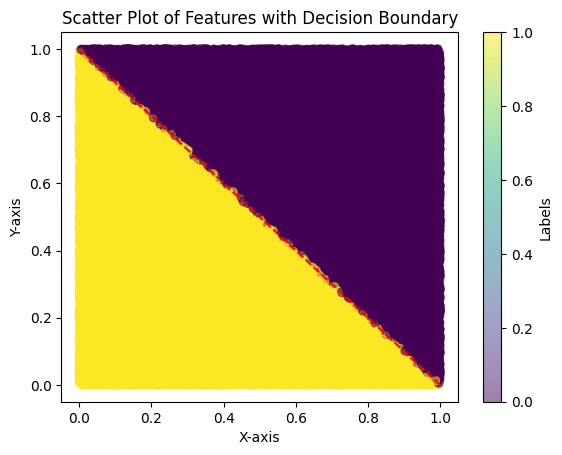


Epoch 1/10
Model | Train Loss: 0.25328 | Valid Loss: 0.10939
Model | Train Accuracy: 95.15% | Valid Accuracy: 98.84%

Epoch 2/10
Model | Train Loss: 0.08545 | Valid Loss: 0.06785
Model | Train Accuracy: 99.45% | Valid Accuracy: 99.55%

Epoch 3/10
Model | Train Loss: 0.05954 | Valid Loss: 0.05163
Model | Train Accuracy: 99.57% | Valid Accuracy: 99.51%

Epoch 4/10
Model | Train Loss: 0.04688 | Valid Loss: 0.04178
Model | Train Accuracy: 99.59% | Valid Accuracy: 99.89%

Epoch 5/10
Model | Train Loss: 0.03928 | Valid Loss: 0.03645
Model | Train Accuracy: 99.59% | Valid Accuracy: 99.50%

Epoch 6/10
Model | Train Loss: 0.03410 | Valid Loss: 0.03174
Model | Train Accuracy: 99.67% | Valid Accuracy: 99.92%

Epoch 7/10
Model | Train Loss: 0.03032 | Valid Loss: 0.02911
Model | Train Accuracy: 99.69% | Valid Accuracy: 99.68%

Epoch 8/10
Model | Train Loss: 0.02749 | Valid Loss: 0.02607
Model | Train Accuracy: 99.75% | Valid Accuracy: 99.83%

Epoch 9/10
Model | Train Loss: 0.02530 | Valid Loss: 0.

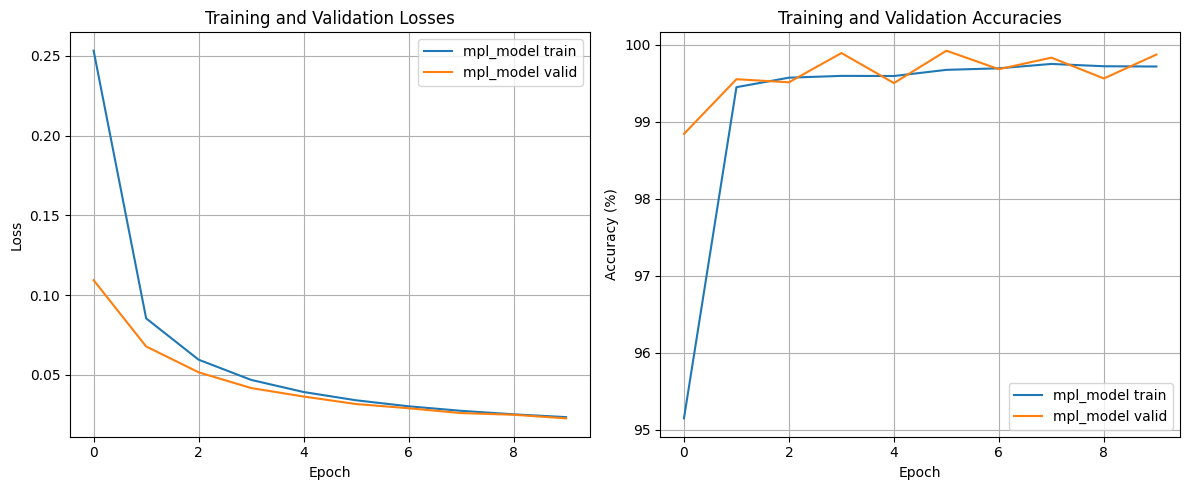

validation loss
mpl_model: 0.02278


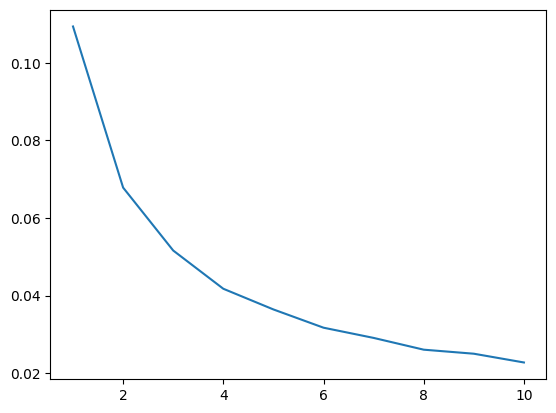

In [2]:
# RNN vari 기반 이름->국가
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random
'''
def generate_data(n_samples=10000, x_amplitude = 1.5, noise_amplitude = 1, batch_size = 32):
    # 표준정규분포(평0, 표준편차1)인 난수샘플 n_samples개의 1차원텐서 생성 : 표준편차 x_amplitude 배
    X = torch.randn(n_samples, 1) * x_amplitude
    noise = torch.randn(n_samples, 1) * noise_amplitude # noise 생성
    y = 3*X + 4 + noise # 생성값 y = 3x + 4 + (노이즈)첨가
    
    dataset = TensorDataset(X, y) # X,y를 하나의 dataset으로 병합
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    return dataloader
'''

class BaseDataLoader:
    def __init__(self, dataset, train_ratio, valid_ratio, batch_size):
        self.dataset = dataset
        self.train_ratio = train_ratio
        self.valid_ratio = valid_ratio
        self.batch_size = batch_size
    
    def prepare_data_loaders(self, dataset):
            total_size = len(dataset)
            train_size = int(self.train_ratio * total_size)
            valid_size = int(self.valid_ratio * total_size)
            test_size = total_size - train_size - valid_size

            train_set, valid_set, test_set = random_split(dataset, [train_size, valid_size, test_size])

            train_loader = DataLoader(train_set, batch_size=self.batch_size, shuffle=True)
            valid_loader = DataLoader(valid_set, batch_size=self.batch_size, shuffle=False)
            test_loader = DataLoader(test_set, batch_size=len(test_set), shuffle=False)# test set 전체 배치로
            return train_loader, valid_loader, test_loader

class CustomDataLoader(BaseDataLoader):
    def __init__(self, dataset_class, train_ratio, valid_ratio, batch_size):
        # 데이터셋 클래스를 사용하여 데이터셋 생성
        self.dataset = dataset_class().create_dataset()  # 클래스 인스턴스화 및 데이터셋 생성
        super().__init__(self.dataset, train_ratio, valid_ratio, batch_size)
    
class CustomDataset1:
    def create_dataset(self):
        return generate_classification(sample_n=10000)
    
    def create_dataset1(self):
        features = torch.randn(1000, 10)  # 1000개의 샘플, 10개의 피처
        labels = torch.randint(0, 2, (1000,))  # 이진 분류 레이블
        plot_data(features, labels)
        dataset = TensorDataset(features, labels)
        return dataset
    
    def generate_classification(sample_n=10000): # x + y < 1 classification data
        x = torch.rand(sample_n, 1)
        y = torch.rand(sample_n, 1)
        features = torch.cat((x, y), dim=1)
        labels = (x + y < 1).int()
        plot_data(features, labels)
        dataset = TensorDataset(features, labels)
        return dataset
    

class CustomDataset2: # 이름 -> 국가
    def create_dataset(self):
        # 예시 데이터 생성
        features = torch.randn(1000, 10)  # 1000개의 샘플, 10개의 피처
        labels = torch.randint(0, 2, (1000,))  # 이진 분류 레이블
        dataset = TensorDataset(features, labels)
        return dataset


def plot_data(features, labels):
    x = features[:, 0]
    y = features[:, 1]  # 두 번째 특성 (Tensor)
    labels = labels.squeeze()
    
    plt.scatter(x, y, c=labels, cmap='viridis', alpha=0.5)
    boundary_x = torch.linspace(0, 1, 100)  # 0부터 1까지 100개의 값을 생성
    boundary_y = 1 - boundary_x
    
    plt.plot(boundary_x, boundary_y, 'r--', label='x + y = 1')
    
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Scatter Plot of Features with Decision Boundary')
    plt.colorbar(label='Labels')
    plt.show()
    
def plot_loss_history(loss_history):
    plt.plot(range(1, len(loss_history)+1), loss_history)
    plt.show()
    
# 모델정의
class Feedforward(nn.Module): # -x+y < 1 classification module
    def __init__(self, input_size, hidden_size, output_size):
        super(Feedforward, self).__init__()
        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2h = nn.Linear(hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
    
    def forward(self, input):
        i2h_out = torch.relu(self.i2h(input))
        h2h_out = torch.relu(self.h2h(i2h_out))
        h2o_out = self.h2o(h2h_out)
        return h2o_out
# 모델 학습
def train(model, dataloader, loss_function, optimizer, ):
    model.train()
    epoch_loss = 0
    correct = 0
    total = 0
    for inputs, targets in dataloader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()                                       # 이전 배치에서 계산된 기울기 초기화
        outputs = model(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets.squeeze(1)).sum().item()
    accuracy = 100 * correct / total
    average_loss = epoch_loss / len(dataloader)
    return average_loss, accuracy

# 모델 검증, 평가
def evaluate(model, dataloader, loss_function):
    model.eval()
    epoch_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = loss_function(outputs, targets)
            
            epoch_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets.squeeze(1)).sum().item()
    accuracy = 100 * correct / total
    average_loss = epoch_loss / len(dataloader)
    return average_loss, accuracy

if __name__ == "__main__":
    DATA_SET = {
        'FNN' : CustomDataset1,
        'RNN' : CustomDataset2,  # 이름 -> 국가
        'model3' : '클래스.dataset3', 
    }
    MODEL_SET = {
        'FNN' : Feedforward(input_size=VOCAB_SIZE,
                            hidden_size=HIDDEN_DIM, output_size=OUTPUT_DIM).to(device)
        'RNN' : '클래스.dataset2',
        'model3' : '클래스.dataset3', 
    }
    # Hyperparameters
    NUM_SAMPLES = 100000
    BATCH_SIZE = 64
    TRAIN_RATIO, VALID_RATIO = 0.7, 0.15
    
    VOCAB_SIZE = 2
    EMBEDDING_DIM = 8 # ?
    HIDDEN_DIM = 32
    OUTPUT_DIM = 2
    
    SEQ_LENGTH = 50  # Length of the input sequence before the delimiter
    EPOCHS = 10
    LEARNING_RATE = 0.001
    LOOKBACK = 3
    # Device configuration print # cuda/cpu
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f'Using device: {device}')
    
    # CustomDataLoader 객체 생성, 데이터셋 클래스를 전달
    data_loader = CustomDataLoader(DATA_SET['model1'],
                                   train_ratio=TRAIN_RATIO, valid_ratio=VALID_RATIO,
                                   batch_size=BATCH_SIZE)
    train_loader, valid_loader, test_loader = data_loader.prepare_data_loaders()
    # 모델 초기화
    fnn =  MODEL_SET['FNN']
    rnn = MODEL_SET['RNN']
    # loss function 정의
    criterion = lambda x, y: torch.nn.functional.cross_entropy(x, y.squeeze().long())
    # criterion = nn.CrossEntropyLoss()
    # criterion = nn.MSELoss()
    optimizers = {
        "fnn" : optim.Adam(fnn.parameters(), lr = LEARNING_RATE)
        "rnn" : optim.Adam(rnn.parameters(), lr = LEARNING_RATE)
        }
    loss_history = {
        'fnn_model': {'train': [], 'valid': []},
        'rnn_model': {'train': [], 'valid': []}, }
    accuracy_history = {
        'fnn_model': {'train': [], 'valid': []},
        'RNN_Manual': {'train': [], 'valid': []},
    }
    
    # 학습시작
    for epoch in range(EPOCHS):
        print(f'\nEpoch {epoch+1}/{EPOCHS}')
        # train FNN
        train_loss, train_accuracy = train(mpl_model, train_loader, criterion, optimizers["fnn"])
        valid_loss, valid_accuracy  = evaluate(mpl_model, valid_loader, criterion)
        loss_history['mpl_model']['train'].append(train_loss)
        loss_history['mpl_model']['valid'].append(valid_loss)
        accuracy_history['mpl_model']['train'].append(train_accuracy)
        accuracy_history['mpl_model']['valid'].append(valid_accuracy)
        print(f'Model | Train Loss: {train_loss:.5f} | Valid Loss: {valid_loss:.5f}')
        print(f'Model | Train Accuracy: {train_accuracy:.3f}% | Valid Accuracy: {valid_accuracy:.3f}%')
        # train Rnn
    
    # 결과 시각화
    plt.figure(figsize=(12,5))
    # 손실 그래프
    plt.subplot(1, 2, 1)
    for model in loss_history:
        plt.plot(loss_history[model]['train'], label=f'{model} train')
        plt.plot(loss_history[model]['valid'], label=f'{model} valid')
    plt.xlabel('Epoch'); plt.ylabel('Loss')
    plt.title('Training and Validation Losses')
    plt.legend(); plt.grid(True)
    # 정확도 그래프
    plt.subplot(1, 2, 2)
    for model in accuracy_history:
        plt.plot(accuracy_history[model]['train'], label=f'{model} train')
        plt.plot(accuracy_history[model]['valid'], label=f'{model} valid')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy (%)')
    plt.title('Training and Validation Accuracies')
    plt.legend(); plt.grid(True)

    plt.tight_layout()
    plt.show()
    
    # 손실 계산
    print("validation loss")
    for model in loss_history:
        x= loss_history[model]['valid'][-1]
        print(f'{model}: {x:.5f}')
    
    plot_loss_history(loss_history[model]['valid']) 

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

def load_and_preprocess_data():
    titanic = sns.load_dataset('titanic')
    titanic = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'survived']]
    titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
    titanic['age'].fillna(titanic['age'].median(), inplace=True) # 결측값을 중앙값으로 대체

    X = titanic.drop('survived', axis=1).values  # 피쳐
    y = titanic['survived'].values  # 레이블
    return X, y

def create_dataloaders(X, y, batch_size=32):
    




class MyLinearLayer(nn.Module):
    def __init__(self, input_size, output_size):
        super(MyLinearLayer, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
        
        self.input_size = input_size
        self.fc1 = nn.Linear(input_size, hidden_size)  # First fully connected layer
        self.relu = nn.ReLU()             # ReLU activation
        self.fc2 = nn.Linear(hidden_size, 1) # Second fully connected layer
        
    def forward(self, x):
        out = self.fc1(x)      # Input to first layer
        out = self.relu(out)   # Apply ReLU
        out = self.fc2(out)    # Output layer
        return out

class RNNManual(nn.Module):
    def __init__(self, vocab_size, hidden_dim, output_dim):
        super(RNNManual, self).__init__()

# 메모순서
 FNN RNN GRU 어탠션 트랜스포머